## Combine distributed simulation output files into one dataframe

In [1]:
import os
import enum
from typing import Union
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from constants import HEADER_NAME, ENCODINGDB, REPORTDAYS, FIRST_ROW_AFTER_BURNIN

In [2]:
from constants import ALL_TARGETED_5_TYPES_SET, \
  TARGETED_TYPE1_TRI_LIST, \
  TARGETED_TYPE2_TRI_LIST, \
  TARGETED_TYPE3_DP_DOUBLE_LIST, \
  TARGETED_TYPE4_ASAQ_FULLDOUBLE_LIST, \
  TARGETED_TYPE5_AL_FULLDOUBLE_LIST

In [3]:
# enums
class StrategyOption(enum.Enum):
  FIVE_YR_CYC = '5_yr_cycling'
  ADP_CYC = 'adaptive_cycling'
  MFT = 'mft'

class OutcomeMetricOption(enum.Enum):
  AUC = 'auc'
  T_UNTIL_1_PERCENT_IN_20_YR_SETTING = ['t0p01', 20.1]
  T_UNTIL_10_PERCENT_IN_20_YR_SETTING = ['t0p1', 20.1]


In [4]:
def construct_medium_df_for_one_specific_setup(setnum, strategy, interrupted_feeding, ifImportation):
  if_imp_folder = 'with_importation' if ifImportation else 'no_importation'
  fdir_path = f'simulation_outputs/{if_imp_folder}/{interrupted_feeding}/set{setnum}/{strategy}'
  final_result = []
  for i in range(1,101):
    df = pd.read_csv(
      os.path.join(fdir_path, f'monthly/{i}.txt'),
      index_col=False,
      names=HEADER_NAME,
      sep='\t'
    ).fillna(0)
    assert df.shape == (361, 283)
    final_result.append(df[ENCODINGDB].T.values)
  final_result = np.stack(final_result)
  assert(final_result.shape == (100, 128, 361))
  onecase_fulldf = pd.DataFrame(
    (((y,) for y in x) for x in final_result), 
    columns=ENCODINGDB
  )
  onecase_fulldf.insert(0, 'Have Importation', ifImportation)
  onecase_fulldf.insert(0, 'Interrupted Feeding', interrupted_feeding)
  onecase_fulldf.insert(0, 'Treatment Strategy', strategy)
  onecase_fulldf.insert(0, 'Set Alias Number', setnum)
  return onecase_fulldf

In [5]:
list_of_medium_dfs = []
for setnum in [3,4,7,8,11,12]:
  for strategy in [x.value for x in StrategyOption]:
    for interrupted_feeding in ['0p0', '0p05', '0p1', '0p15', '0p2']:
      for ifImportation in [False, True]:
        ans = construct_medium_df_for_one_specific_setup(
          setnum, strategy, interrupted_feeding, ifImportation
        )
        list_of_medium_dfs.append(ans)

In [6]:
final_ans_one_big_df = pd.concat(list_of_medium_dfs)

In [7]:
final_ans_one_big_df

,Set Alias Number,Treatment Strategy,Interrupted Feeding,Have Importation,KNY--C1x,KNY--C1X,KNY--C2x,KNY--C2X,KNY--Y1x,KNY--Y1X,...,TNFNFY2x,TNFNFY2X,TYFYFC1x,TYFYFC1X,TYFYFC2x,TYFYFC2X,TYFYFY1x,TYFYFY1X,TYFYFY2x,TYFYFY2X
0,3,5_yr_cycling,0p0,False,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,3,5_yr_cycling,0p0,False,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,3,5_yr_cycling,0p0,False,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3,5_yr_cycling,0p0,False,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,3,5_yr_cycling,0p0,False,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

## Helper functions to make plots

In [8]:
def calc_after_burnin_auc_from_list(summed_genofreq_list):
  from constants import REPORTDAYS, FIRST_ROW_AFTER_BURNIN
  import numpy as np
  if len(summed_genofreq_list) == len(REPORTDAYS): # data includes burn-in
    no_burnin_summed_genofreq_list = summed_genofreq_list[FIRST_ROW_AFTER_BURNIN:]
  else:
    assert(len(summed_genofreq_list) == len(REPORTDAYS[FIRST_ROW_AFTER_BURNIN:]))
    no_burnin_summed_genofreq_list = summed_genofreq_list
  return np.trapz(
    no_burnin_summed_genofreq_list,
    x=REPORTDAYS[FIRST_ROW_AFTER_BURNIN:]
  )

In [9]:
def calc_100_auc_or_t_until_n_values_for_one_strategy_with_selected_genotypes(
  df_with_one_strategy: pd.DataFrame, 
  selected_genotypes: list, 
  auc_or_t_until_n_flag: OutcomeMetricOption, 
  strategy_label: str,
  verbose:bool = False,
  hide_95_percentile:bool = False
) -> tuple:
  import numpy as np
  if (auc_or_t_until_n_flag != OutcomeMetricOption.AUC):
    t_until_n_never_reach_marker = auc_or_t_until_n_flag.value[1]
  def calc_after_burnin_auc_from_list(summed_genofreq_list):
    if len(summed_genofreq_list) == len(REPORTDAYS): # data includes burn-in
      no_burnin_summed_genofreq_list = summed_genofreq_list[FIRST_ROW_AFTER_BURNIN:]
    else:
      assert(len(summed_genofreq_list) == len(REPORTDAYS[FIRST_ROW_AFTER_BURNIN:]))
      no_burnin_summed_genofreq_list = summed_genofreq_list
    return np.trapz(
      no_burnin_summed_genofreq_list,
      x=REPORTDAYS[FIRST_ROW_AFTER_BURNIN:]
    )
  
  def report_index_until_geno_freq_reaches_n(summed_genofreq_list):
    assert(isinstance(summed_genofreq_list, np.ndarray))
    assert(summed_genofreq_list.shape == (361,))
    # for never reached scenarios, manually adjust
    if not np.any(summed_genofreq_list >= n): return t_until_n_never_reach_marker
    idx = np.argmax(summed_genofreq_list[FIRST_ROW_AFTER_BURNIN:] >= n)
    # convert from index to actual reported days
    # then convert to year after burn-in
    return REPORTDAYS[FIRST_ROW_AFTER_BURNIN+idx] / 365 - 10
  
  list_of_100_runs_separated_genotype = np.sum(df_with_one_strategy[selected_genotypes], axis=1)
  list_of_100_runs_summed_genotype = np.array(
    [np.array(x).sum(axis=0) for x in list_of_100_runs_separated_genotype]
  )
  assert(list_of_100_runs_summed_genotype.shape == (100,361)) # 100 simulation runs, 361 report data points
  if auc_or_t_until_n_flag == OutcomeMetricOption.AUC:
    ans = np.apply_along_axis(calc_after_burnin_auc_from_list, 1, list_of_100_runs_summed_genotype)
  else:
    if (auc_or_t_until_n_flag == OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING):
      n = 0.01
    elif (auc_or_t_until_n_flag == OutcomeMetricOption.T_UNTIL_10_PERCENT_IN_20_YR_SETTING):
      n = 0.1
    ans = np.apply_along_axis(
      report_index_until_geno_freq_reaches_n, 
      1, 
      list_of_100_runs_summed_genotype
    )
  assert(ans.shape == (100,))
  llq, lq, median, uq, uuq = np.percentile(ans, [2.5, 25, 50, 75, 97.5])
  if hide_95_percentile: llq, uuq = lq, uq
  box_one_strategy = {
    'label' : strategy_label,
    'whislo': llq,
    'q1'    : lq,
    'med'   : median,
    'q3'    : uq,
    'whishi': uuq,
    'fliers': []
  }
  if verbose: # print out results
    print('{:7.2f} ({:7.2f}-{:7.2f})'.format(median, lq, uq))
  return ans, box_one_strategy

In [10]:
def get_iif_wrt_pfpr_setting_for_x_labels(yml_iif_label: str, pfpr) -> str:
  assert pfpr in ['5%', '20%']
  if pfpr == '5%':
    lookup_dict = {
      '0p0': '0%',
      '0p05': '100%',
      '0p1': 'greater\nthan\n100%',
      '0p15': 'greater\nthan\n100%',
      '0p2': 'greater\nthan\n100%'
    }
  else:
    lookup_dict = {
      '0p0': '0%',
      '0p05': '25%',
      '0p1': '50%',
      '0p15': '75%',
      '0p2': '100%'
    }
  return lookup_dict[yml_iif_label]

In [11]:
def calc_one_setting_with_three_strategies_box_plot_with_selected_genotypes(
  df_with_three_strategies: pd.DataFrame,
  selected_genotypes: list,
  auc_or_t_until_n_flag: OutcomeMetricOption,
  strategy_selection: Union[StrategyOption, None] = None,
  pfpr_setting = None,
  strategy_label_leading_string: str = '',
  hide_95_percentile: bool = False,
  verbose: bool = False
) -> list:
  
  # if only one strategy is selected (for vertical box plots)
  # need to provide PfPR setting for the plot to show a converted x-labels
  if strategy_selection is not None: assert(pfpr_setting is not None)

  # return value initiation
  box_m, box_c, box_ac = None, None, None

  if (strategy_selection is None) or (strategy_selection == StrategyOption.MFT):
    # if all strategies are selected, need to add trailing flags to label
    if strategy_selection is None:
      label = strategy_label_leading_string+',MFT'
    else:
      label = get_iif_wrt_pfpr_setting_for_x_labels(strategy_label_leading_string, pfpr_setting)
    if verbose: print('MFT')
    anses_m, box_m = calc_100_auc_or_t_until_n_values_for_one_strategy_with_selected_genotypes(
      df_with_three_strategies[
        df_with_three_strategies['Treatment Strategy'] == 'mft'
      ],
      selected_genotypes,
      auc_or_t_until_n_flag,
      label,
      verbose=verbose,
      hide_95_percentile=hide_95_percentile
    )
  
  if (strategy_selection is None) or (strategy_selection == StrategyOption.FIVE_YR_CYC):
    if strategy_selection is None:
      label = strategy_label_leading_string+',5-Year Cycling'
    else:
      label = get_iif_wrt_pfpr_setting_for_x_labels(strategy_label_leading_string, pfpr_setting)
    if verbose: print('5-Year Cycling')
    anses_c, box_c = calc_100_auc_or_t_until_n_values_for_one_strategy_with_selected_genotypes(
      df_with_three_strategies[
        df_with_three_strategies['Treatment Strategy'] == '5_yr_cycling'
      ],
      selected_genotypes,
      auc_or_t_until_n_flag,
      label, 
      verbose=verbose,
      hide_95_percentile=hide_95_percentile
    )
    
  if (strategy_selection is None) or (strategy_selection == StrategyOption.ADP_CYC):
    if strategy_selection is None:
      label = strategy_label_leading_string+',Adaptive Cycling'
    else:
      label = get_iif_wrt_pfpr_setting_for_x_labels(strategy_label_leading_string, pfpr_setting)
    if verbose: print('Adaptive Cycling')
    anses_ac, box_ac = calc_100_auc_or_t_until_n_values_for_one_strategy_with_selected_genotypes(
      df_with_three_strategies[
        df_with_three_strategies['Treatment Strategy'] == 'adaptive_cycling'
      ],
      selected_genotypes,
      auc_or_t_until_n_flag,
      label,
      verbose=verbose,
      hide_95_percentile=hide_95_percentile
    )
  return list(filter(lambda x: x is not None, [box_m, box_c, box_ac])) # filter out None's
  

In [12]:
def plot_one_set_alias_across_iif_settings(
  ax: plt.Axes,
  df_with_one_set_alias_multiple_iifs: pd.DataFrame,
  selected_genotypes: list,
  auc_or_t_until_n_flag: OutcomeMetricOption,
  verbose: bool = False,
  hide_95_percentile: bool = False,
  strategy_selection: Union[StrategyOption, None] = None,
  pfpr_setting: Union[str, None] = None,
  bxp_vert: bool = False
) -> None:
  from itertools import cycle
  
  if verbose: print(f'METRIC={auc_or_t_until_n_flag}')
  box_plot_data_across_iif = []
  for interrupted_feeding in ['0p0', '0p05', '0p1', '0p15', '0p2']:
    df_with_three_strategies = df_with_one_set_alias_multiple_iifs[
      df_with_one_set_alias_multiple_iifs['Interrupted Feeding'] == interrupted_feeding
    ]
    if verbose: print(f'***interrupted_feeding={interrupted_feeding}***')
    box_plot_data_one_iif = calc_one_setting_with_three_strategies_box_plot_with_selected_genotypes(
      df_with_three_strategies,
      selected_genotypes,
      auc_or_t_until_n_flag,
      strategy_selection=strategy_selection,
      pfpr_setting=pfpr_setting,
      strategy_label_leading_string=interrupted_feeding,
      verbose=verbose,
      hide_95_percentile=hide_95_percentile
    )
    box_plot_data_across_iif.extend(box_plot_data_one_iif)
  
    bplot = ax.bxp(
      box_plot_data_across_iif, 
      showfliers=False, 
      vert=bxp_vert, 
      patch_artist=True,
      medianprops=dict(color='k')
    )
    if strategy_selection == StrategyOption.MFT:
      colors = ['#cadab0']
    elif strategy_selection == StrategyOption.FIVE_YR_CYC:
      colors = ['#a6cfd8']
    elif strategy_selection == StrategyOption.ADP_CYC:
      colors = ['#d1a29b']
    else:
      # circle thru green, blue, coral if all strategies are selected
      colors = ['#cadab0', '#a6cfd8', '#d1a29b'] 
    for patch, color in zip(bplot['boxes'], cycle(colors)):
      patch.set_facecolor(color)

## Main plottings

In [13]:
filtered_df = final_ans_one_big_df[
  (final_ans_one_big_df['Set Alias Number'] == 7)
  & (final_ans_one_big_df['Have Importation'] == True)
]

### Individual panels

METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
MFT
  12.51 (  10.66-  13.79)
5-Year Cycling
   8.89 (   7.13-  11.51)
Adaptive Cycling
   6.85 (   5.93-   7.45)
***interrupted_feeding=0p05***
MFT
   9.80 (   8.70-  10.85)
5-Year Cycling
   7.93 (   6.66-   9.01)
Adaptive Cycling
   6.51 (   5.82-   7.43)
***interrupted_feeding=0p1***
MFT
   7.97 (   7.01-   8.62)
5-Year Cycling
   7.26 (   6.34-   7.95)
Adaptive Cycling
   6.47 (   5.84-   6.93)
***interrupted_feeding=0p15***
MFT
   6.47 (   5.84-   7.01)
5-Year Cycling
   6.26 (   5.68-   7.20)
Adaptive Cycling
   6.14 (   5.59-   6.59)
***interrupted_feeding=0p2***
MFT
   5.68 (   5.26-   6.34)
5-Year Cycling
   6.01 (   5.32-   6.95)
Adaptive Cycling
   5.72 (   5.26-   6.34)


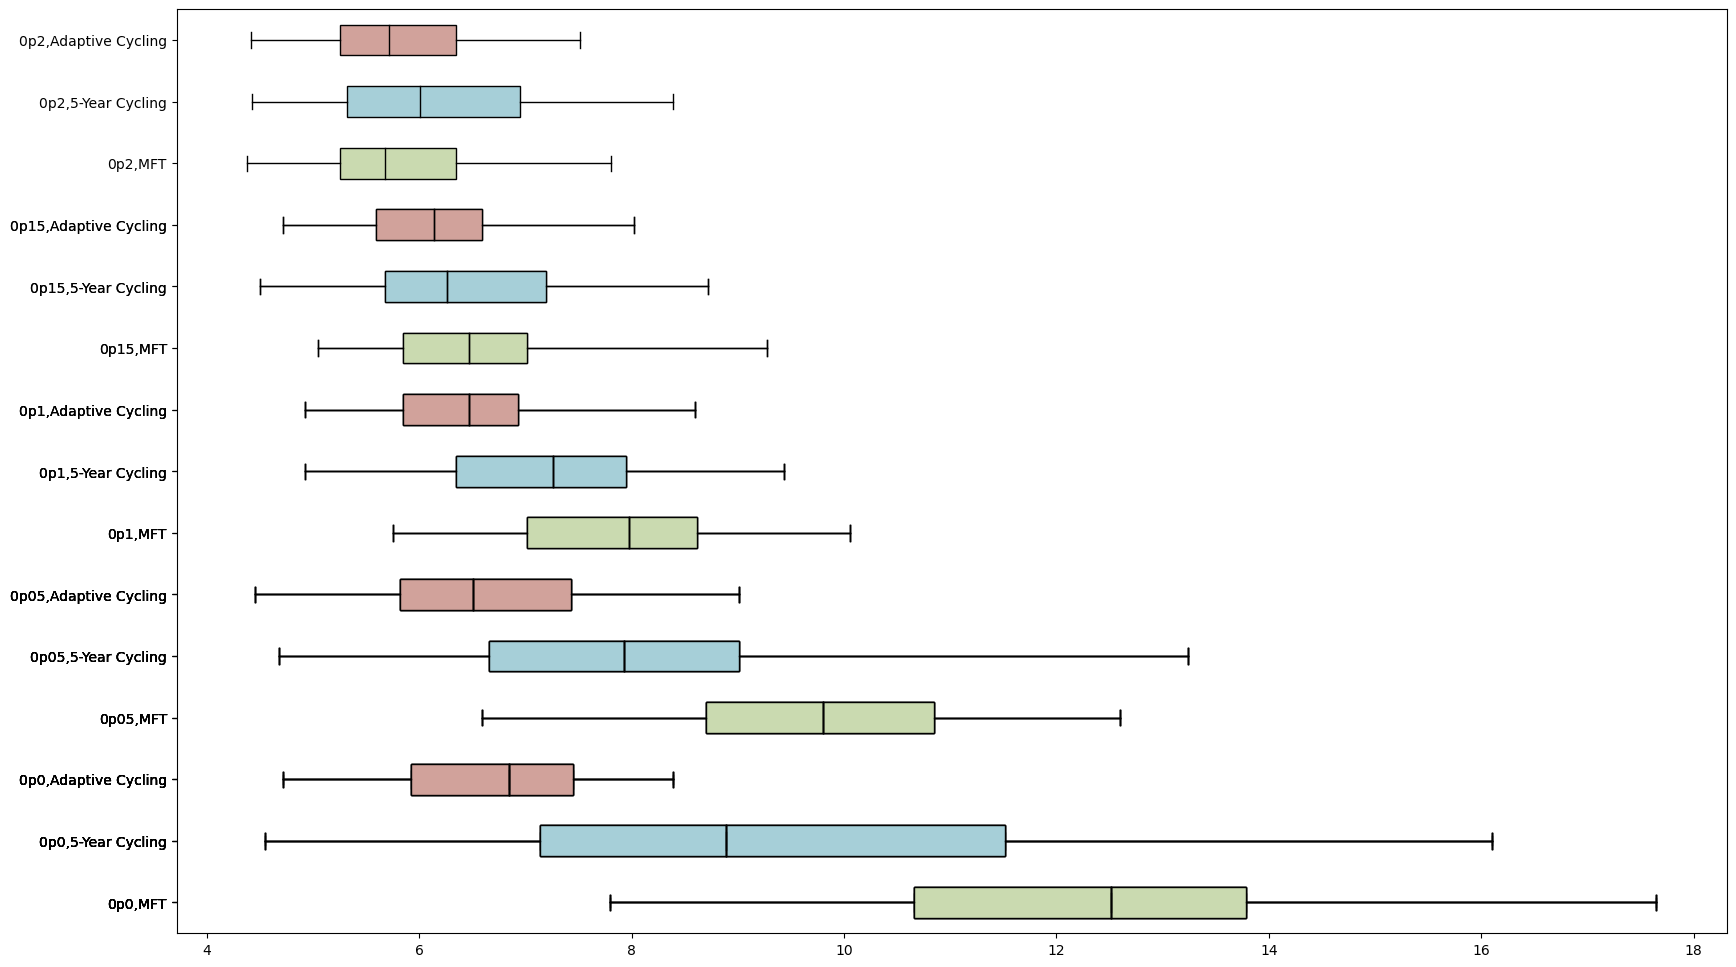

In [14]:
# across strategies, horizontal box plot
plt.rcParams['figure.figsize'] = [20, 12]
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plot_one_set_alias_across_iif_settings(
  ax,
  filtered_df,
  ALL_TARGETED_5_TYPES_SET,
  OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING,
  verbose=True
)

METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
MFT
  22.38 (  11.63-  43.44)
5-Year Cycling
  78.35 (  40.41- 135.21)
Adaptive Cycling
 308.25 ( 221.89- 391.77)
***interrupted_feeding=0p05***
MFT
  81.24 (  57.96- 105.56)
5-Year Cycling
 148.05 ( 106.17- 195.10)
Adaptive Cycling
 252.79 ( 200.70- 314.96)
***interrupted_feeding=0p1***
MFT
 201.18 ( 163.97- 245.23)
5-Year Cycling
 245.90 ( 201.92- 287.40)
Adaptive Cycling
 252.21 ( 231.76- 299.52)
***interrupted_feeding=0p15***
MFT
 346.29 ( 306.88- 391.98)
5-Year Cycling
 349.42 ( 291.22- 394.01)
Adaptive Cycling
 295.69 ( 259.45- 321.90)
***interrupted_feeding=0p2***
MFT
 468.98 ( 416.26- 518.35)
5-Year Cycling
 422.93 ( 354.10- 464.40)
Adaptive Cycling
 335.96 ( 294.44- 358.60)


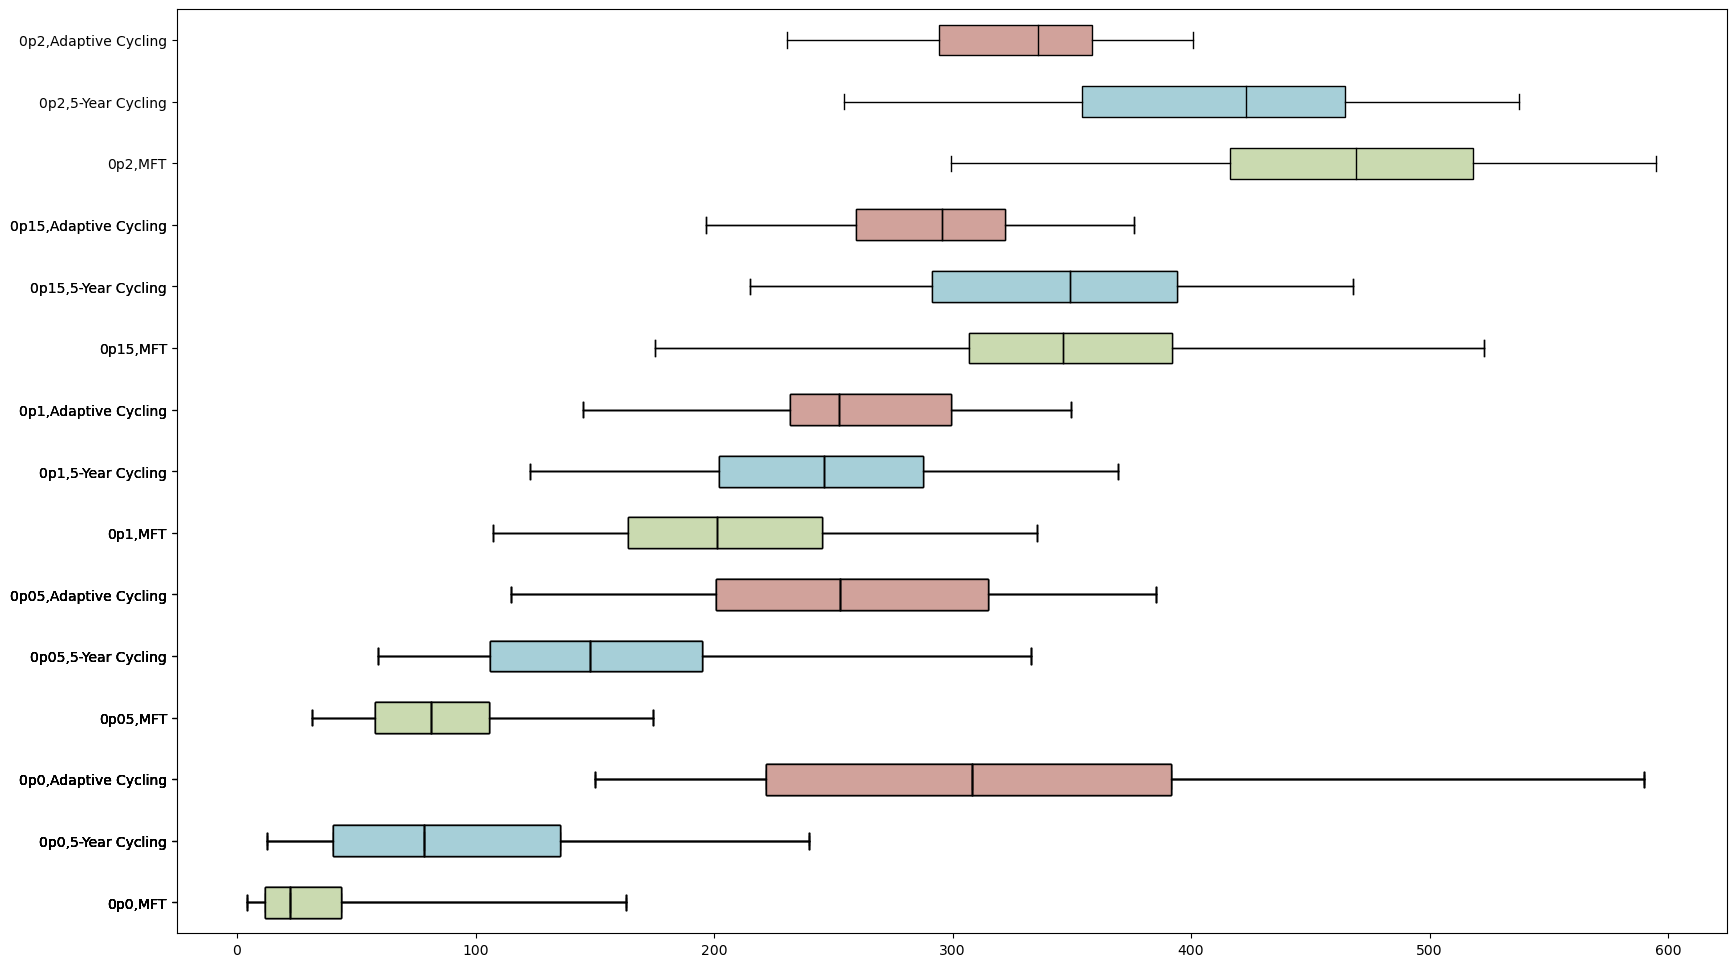

In [15]:
plt.rcParams['figure.figsize'] = [20, 12]
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plot_one_set_alias_across_iif_settings(
  ax,
  filtered_df,
  TARGETED_TYPE1_TRI_LIST,
  OutcomeMetricOption.AUC,
  verbose=True
)

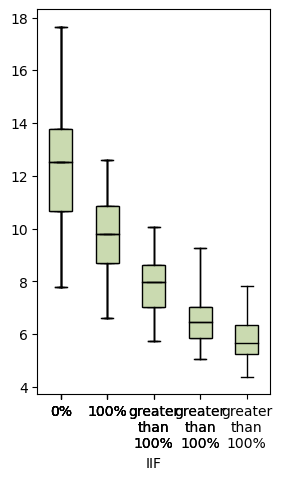

In [16]:
# one strategy selected, vertical box plot
plt.rcParams['text.usetex'] = False
plt.rcParams['figure.figsize'] = [3,5]
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('IIF')
# ax.set_ylabel(r'$T_{1%}$')
plot_one_set_alias_across_iif_settings(
  ax,
  filtered_df,
  ALL_TARGETED_5_TYPES_SET,
  OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING,
  strategy_selection=StrategyOption.MFT,
  pfpr_setting='5%',
  bxp_vert=True
)

### Combined panels, with three strategies in each panel

In [17]:
class FigureSuperTitleOptions(enum.Enum):
  WITH_IMPORTATION = [True, 'With importation']
  NO_IMPORTATION = [False, 'No importation']
  AUC = [OutcomeMetricOption.AUC, 'AUC values']
  T_UNTIL_1_PERCENT_IN_20_YR_SETTING = [OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING, 'time until 1%']

def format_plot_labels_for_combined_panels_horizontal_barplots(
  fig: plt.Figure,
  axes: plt.Axes,
  title_importation_string: str,
  title_outcome_metric_string: str
) -> None:
  axes[0][0].set_title('20% coverage')
  axes[0][1].set_title('40% coverage')
  axes[0][2].set_title('60% coverage')
  axes[0][0].set_ylabel('PfPR = 5%', multialignment='left', 
                      horizontalalignment='left', rotation=0, 
                      labelpad=100)
  axes[1][0].set_ylabel('PfPR = 20%', multialignment='left', 
                      horizontalalignment='left', rotation=0, 
                      labelpad=100)
  fig.suptitle(f'{title_importation_string}, {title_outcome_metric_string}', y=0.95, fontweight='bold')

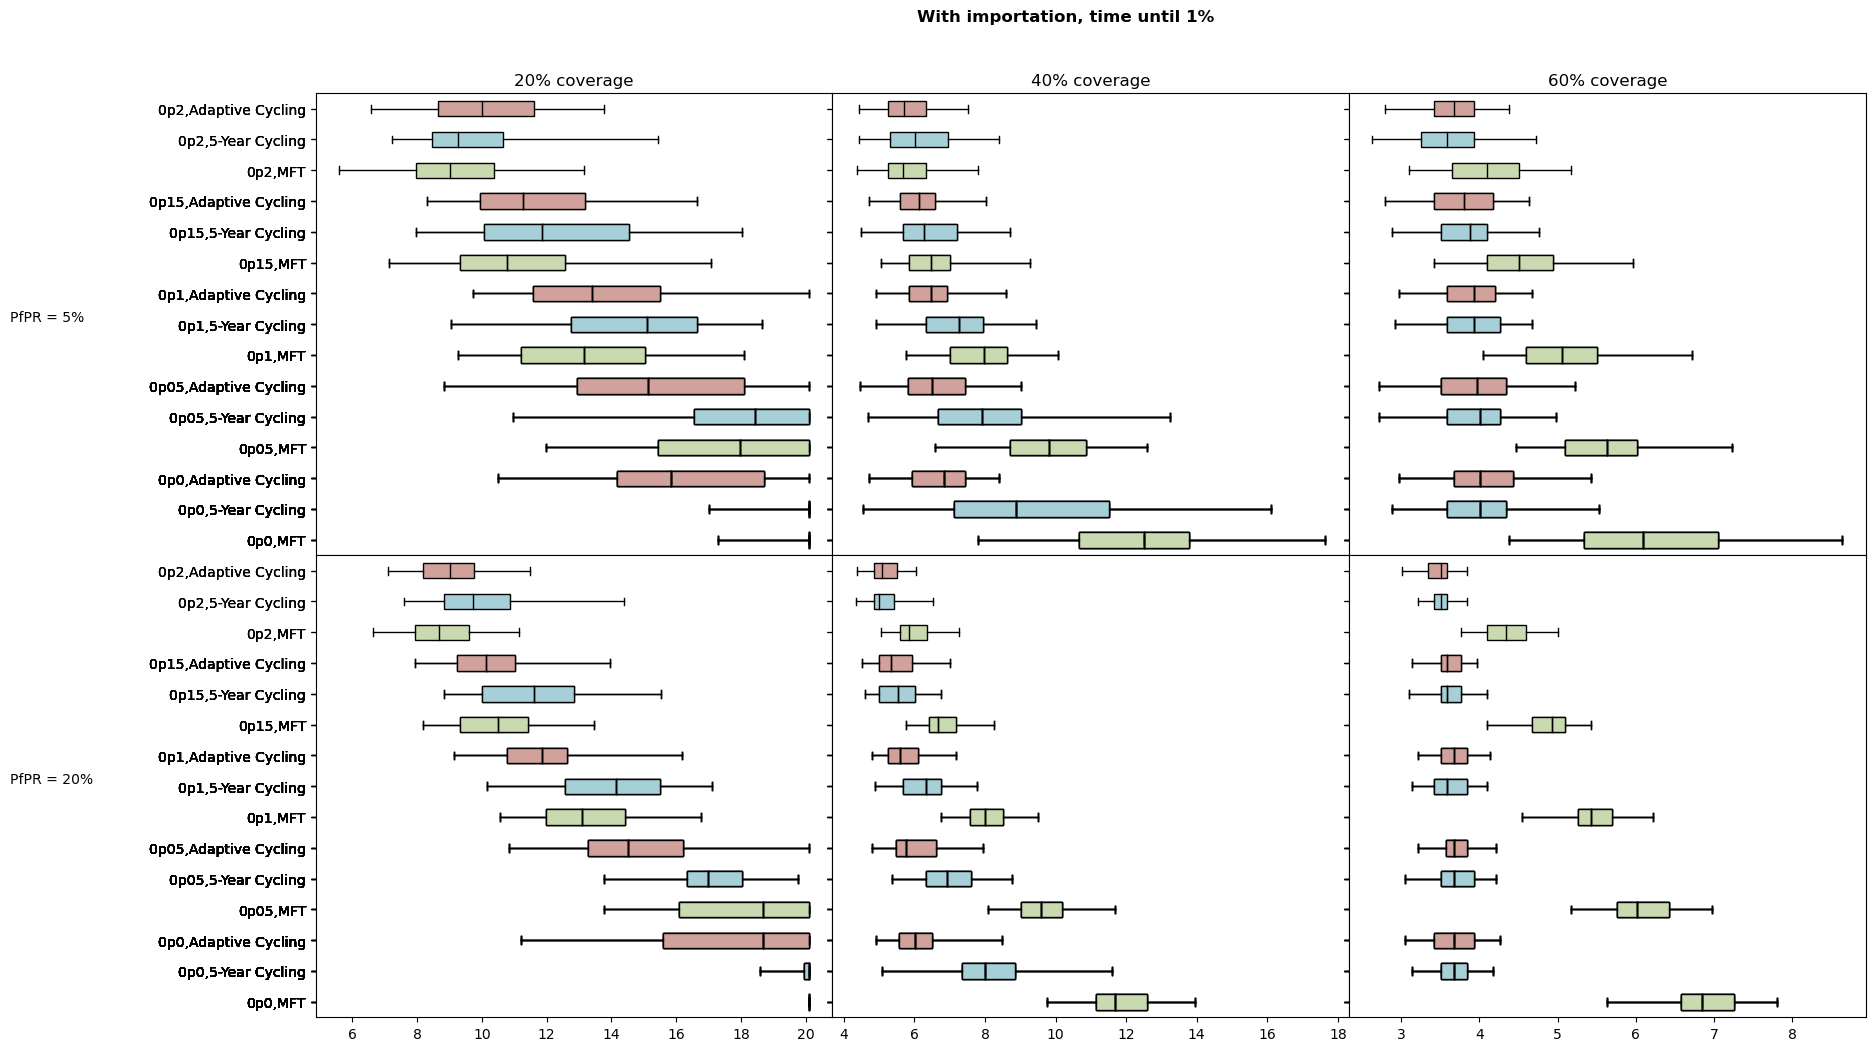

In [18]:
# with importation, time until 1%
plt.rcParams['figure.figsize'] = [20, 12]
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
ax_row1, ax_row2 = axes

# plot_settings
hide_95_percentile = False
verbose = False
if_have_importation = FigureSuperTitleOptions.WITH_IMPORTATION
which_outcome_metric = FigureSuperTitleOptions.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
target_genotype = [ALL_TARGETED_5_TYPES_SET, 'ALL_TARGETED_5_TYPES_SET']
if_save_svg = False

if verbose: print(f'IMPORTATION FLAG={if_have_importation.value[0]}')
if verbose: print(f'TARGET GENOTYPES={target_genotype[1]}')
for (set_alias, ax_idx) in zip([3,7,11], [0,1,2]):
  if verbose: print(f'SET ALIAS={set_alias}')
  filtered_df_one_alias_importation_setting = final_ans_one_big_df[
    (final_ans_one_big_df['Set Alias Number'] == set_alias)
    & (final_ans_one_big_df['Have Importation'] == if_have_importation.value[0])
  ]
  plot_one_set_alias_across_iif_settings(
    ax_row1[ax_idx],
    filtered_df_one_alias_importation_setting,
    target_genotype[0],
    which_outcome_metric.value[0],
    verbose=verbose,
    hide_95_percentile=hide_95_percentile
  )
  if verbose: print()

for (set_alias, ax_idx) in zip([4,8,12], [0,1,2]):
  if verbose: print(f'SET ALIAS={set_alias}')
  filtered_df_one_alias_importation_setting = final_ans_one_big_df[
    (final_ans_one_big_df['Set Alias Number'] == set_alias)
    & (final_ans_one_big_df['Have Importation'] == if_have_importation.value[0])
  ]
  plot_one_set_alias_across_iif_settings(
    ax_row2[ax_idx],
    filtered_df_one_alias_importation_setting,
    target_genotype[0],
    which_outcome_metric.value[0],
    verbose=verbose,
    hide_95_percentile=hide_95_percentile
  )
  if verbose: print()

format_plot_labels_for_combined_panels_horizontal_barplots(fig, axes, if_have_importation.value[1], which_outcome_metric.value[1])
if if_save_svg:
  plt.savefig(fname=f'{if_have_importation.value[1]}_{which_outcome_metric.value[1]}.svg', format='svg', bbox_inches='tight')


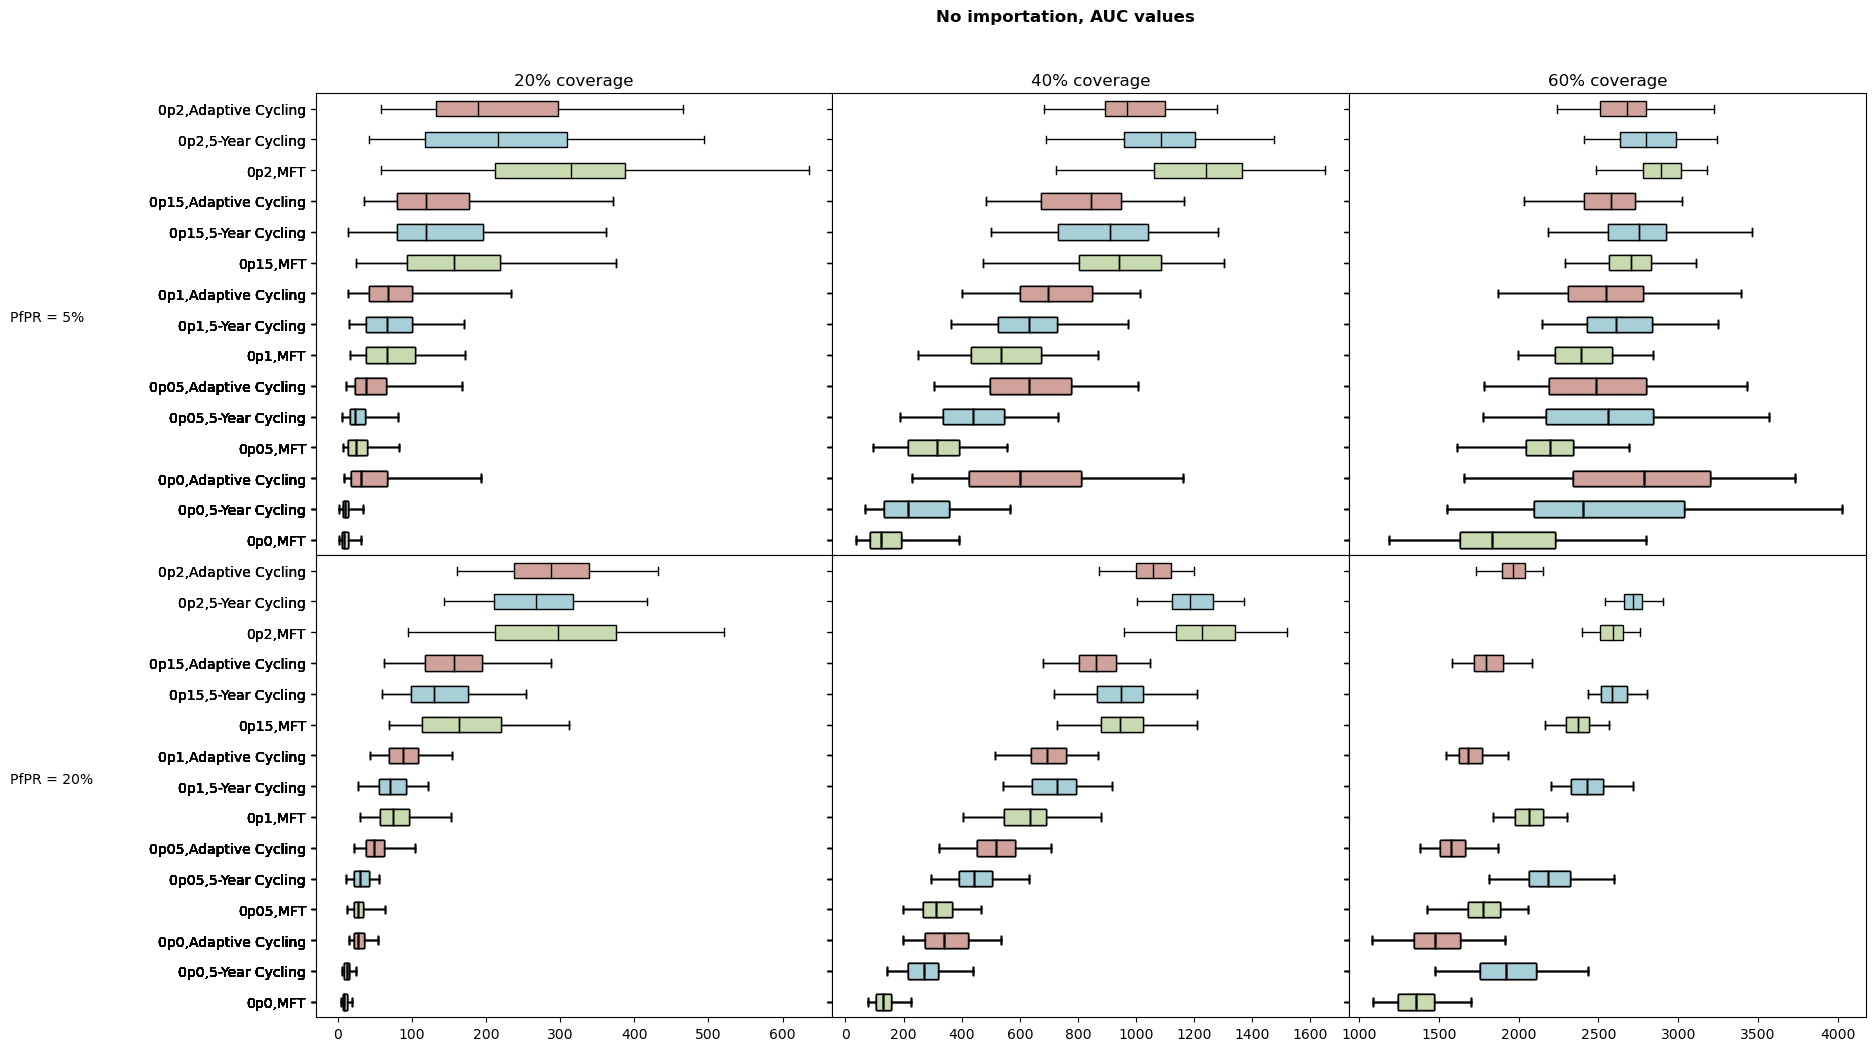

In [19]:
# no importation, AUC values
plt.rcParams['figure.figsize'] = [20, 12]
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
ax_row1, ax_row2 = axes

# plot_settings
hide_95_percentile = False
verbose = False
if_have_importation = FigureSuperTitleOptions.NO_IMPORTATION
which_outcome_metric = FigureSuperTitleOptions.AUC
target_genotype = [ALL_TARGETED_5_TYPES_SET, 'ALL_TARGETED_5_TYPES_SET']
if_save_svg = False

if verbose: print(f'IMPORTATION FLAG={if_have_importation.value[0]}')
if verbose: print(f'TARGET GENOTYPES={target_genotype[1]}')
for (set_alias, ax_idx) in zip([3,7,11], [0,1,2]):
  if verbose: print(f'SET ALIAS={set_alias}')
  filtered_df_one_alias_importation_setting = final_ans_one_big_df[
    (final_ans_one_big_df['Set Alias Number'] == set_alias)
    & (final_ans_one_big_df['Have Importation'] == if_have_importation.value[0])
  ]
  plot_one_set_alias_across_iif_settings(
    ax_row1[ax_idx],
    filtered_df_one_alias_importation_setting,
    target_genotype[0],
    which_outcome_metric.value[0],
    verbose=verbose,
    hide_95_percentile=hide_95_percentile
  )
  if verbose: print()

for (set_alias, ax_idx) in zip([4,8,12], [0,1,2]):
  if verbose: print(f'SET ALIAS={set_alias}')
  filtered_df_one_alias_importation_setting = final_ans_one_big_df[
    (final_ans_one_big_df['Set Alias Number'] == set_alias)
    & (final_ans_one_big_df['Have Importation'] == if_have_importation.value[0])
  ]
  plot_one_set_alias_across_iif_settings(
    ax_row2[ax_idx],
    filtered_df_one_alias_importation_setting,
    target_genotype[0],
    which_outcome_metric.value[0],
    verbose=verbose,
    hide_95_percentile=hide_95_percentile
  )
  if verbose: print()

format_plot_labels_for_combined_panels_horizontal_barplots(fig, axes, if_have_importation.value[1], which_outcome_metric.value[1])
if if_save_svg:
  plt.savefig(fname=f'{if_have_importation.value[1]}_{which_outcome_metric.value[1]}.svg', format='svg', bbox_inches='tight')


### Combined panels, with one strategy in each panel

In [20]:
pfpr_setting_set_alias_dict = {
  '5%': ['5%', [3,7,11]],
  '20%': ['20%', [4,8,12]]
}

def format_plot_labels_for_combined_panels_vertical_barplots(
  fig: plt.Figure,
  axes: plt.Axes,
  title_importation_string: str,
  title_outcome_metric_string: str,
  pfpr_y_label_string: str
) -> None:
  axes[0][0].set_title('MFT')
  axes[0][1].set_title('5-Year Cycling')
  axes[0][2].set_title('Adaptive Cycling')
  
  axes[0][0].set_ylabel('Drug coverage = 20%', multialignment='left', 
                        horizontalalignment='left', rotation=0, 
                        labelpad=120)
  axes[1][0].set_ylabel('Drug coverage = 40%', multialignment='left', 
                      horizontalalignment='left', rotation=0, 
                      labelpad=120)
  axes[2][0].set_ylabel('Drug coverage = 60%', multialignment='left', 
                        horizontalalignment='left', rotation=0, 
                        labelpad=120)
  
  fig.suptitle(
    f'{title_importation_string}, {title_outcome_metric_string} values, PfPR={pfpr_y_label_string}', 
    y=0.9,
    fontweight='bold'
  )
#   # TODO - to create a virtual big frame and set y label there, or do it in illustrator
#   fig.ylabel('Years until 1% MDR')

In [21]:
# no importations

METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
5-Year Cycling
   9.70 (   6.37-  14.04)
***interrupted_feeding=0p05***
5-Year Cycling
  22.67 (  15.73-  35.96)
***interrupted_feeding=0p1***
5-Year Cycling
  66.37 (  38.44-  99.89)
***interrupted_feeding=0p15***
5-Year Cycling
 118.38 (  79.75- 195.56)
***interrupted_feeding=0p2***
5-Year Cycling
 216.50 ( 117.95- 309.79)
METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
Adaptive Cycling
  31.36 (  17.49-  66.81)
***interrupted_feeding=0p05***
Adaptive Cycling
  38.08 (  23.74-  65.15)
***interrupted_feeding=0p1***
Adaptive Cycling
  67.51 (  42.15-  99.55)
***interrupted_feeding=0p15***
Adaptive Cycling
 118.24 (  79.96- 177.49)
***interrupted_feeding=0p2***
Adaptive Cycling
 188.77 ( 132.85- 296.61)
METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
MFT
   7.82 (   4.95-  13.57)
***interrupted_feeding=0p05***
MFT
  24.00 (  14.31-  39.52)
***interrupted_feeding=0p1***
MFT
  66.10 (  37.94- 104.03)
**

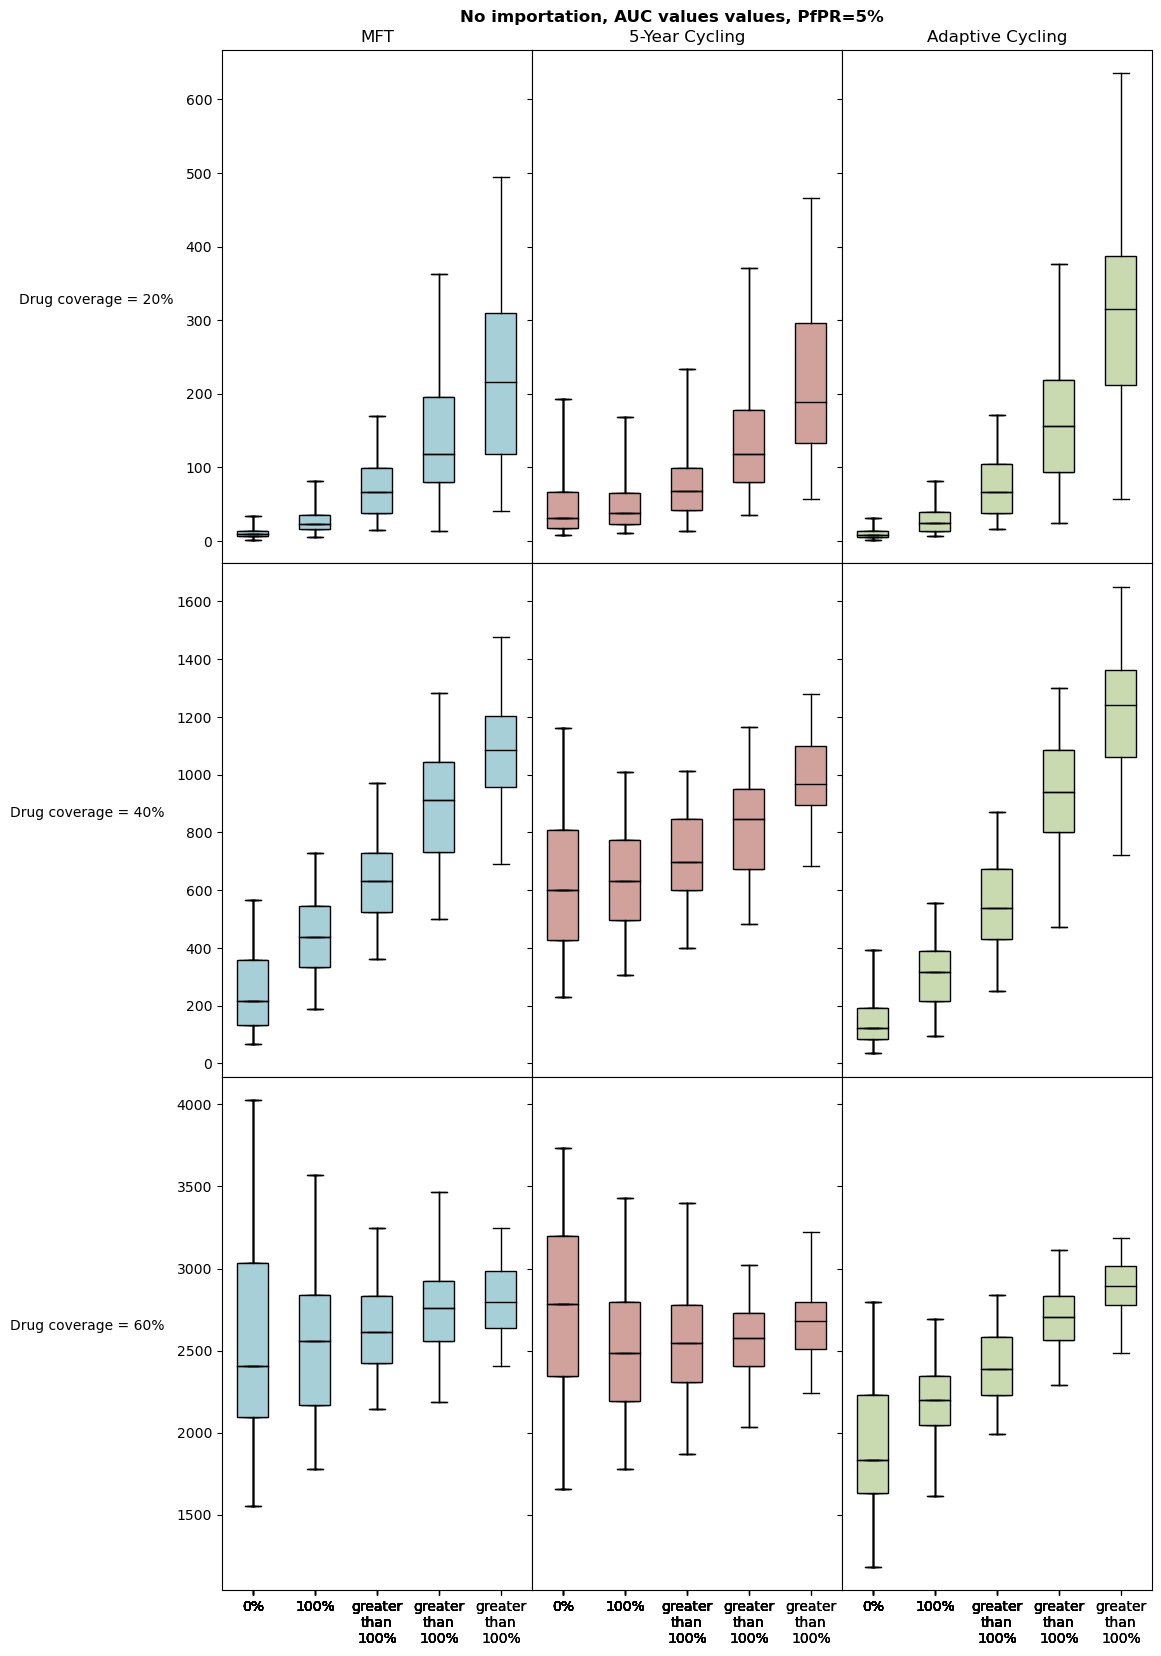

In [22]:
# no importation, AUC values
# 5% PfPR
plt.rcParams['figure.figsize'] = [12, 20]
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
ax_row1, ax_row2, ax_row3 = axes

# plot_settings
hide_95_percentile = False
verbose = True
if_have_importation = FigureSuperTitleOptions.NO_IMPORTATION
which_outcome_metric = FigureSuperTitleOptions.AUC
pfpr_setting, set_numbers = pfpr_setting_set_alias_dict['5%']
target_genotype = [ALL_TARGETED_5_TYPES_SET, 'ALL_TARGETED_5_TYPES_SET']
if_save_svg = True

for (set_alias, ax_row) in zip(set_numbers, [ax_row1, ax_row2, ax_row3]):
  ax_row_ptr = ax_row
  # each panel is one strategy
  for (ax_idx, strategy) in zip([0,1,2],StrategyOption):
    filtered_df_one_alias_importation_setting_one_strategy = final_ans_one_big_df[
      (final_ans_one_big_df['Set Alias Number'] == set_alias)
      & (final_ans_one_big_df['Have Importation'] == if_have_importation.value[0])
      & (final_ans_one_big_df['Treatment Strategy'] == strategy.value)
    ]
    plot_one_set_alias_across_iif_settings(
      ax_row_ptr[ax_idx],
      filtered_df_one_alias_importation_setting_one_strategy,
      target_genotype[0],
      which_outcome_metric.value[0],
      verbose=verbose,
      hide_95_percentile=False,
      strategy_selection=strategy,
      pfpr_setting=pfpr_setting,
      bxp_vert=True
    )

format_plot_labels_for_combined_panels_vertical_barplots(
  fig, 
  axes, 
  if_have_importation.value[1], 
  which_outcome_metric.value[1], 
  pfpr_setting
)
if if_save_svg: 
  plt.savefig(fname=f'{if_have_importation.value[1]}_{which_outcome_metric.value[1]}_{pfpr_setting}PfPR.svg', 
              format='svg', bbox_inches='tight')


METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
5-Year Cycling
  11.82 (   8.60-  15.31)
***interrupted_feeding=0p05***
5-Year Cycling
  29.49 (  21.16-  42.19)
***interrupted_feeding=0p1***
5-Year Cycling
  69.71 (  55.61-  92.57)
***interrupted_feeding=0p15***
5-Year Cycling
 130.29 (  99.31- 175.02)
***interrupted_feeding=0p2***
5-Year Cycling
 266.98 ( 210.78- 316.79)
METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
Adaptive Cycling
  27.68 (  22.14-  34.61)
***interrupted_feeding=0p05***
Adaptive Cycling
  48.70 (  38.39-  61.73)
***interrupted_feeding=0p1***
Adaptive Cycling
  88.40 (  68.54- 107.64)
***interrupted_feeding=0p15***
Adaptive Cycling
 157.00 ( 117.75- 193.83)
***interrupted_feeding=0p2***
Adaptive Cycling
 287.74 ( 237.19- 338.39)
METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
MFT
   8.87 (   6.23-  12.01)
***interrupted_feeding=0p05***
MFT
  27.32 (  21.26-  34.53)
***interrupted_feeding=0p1***
MFT
  74.78 (  56.38-  95.96)
**

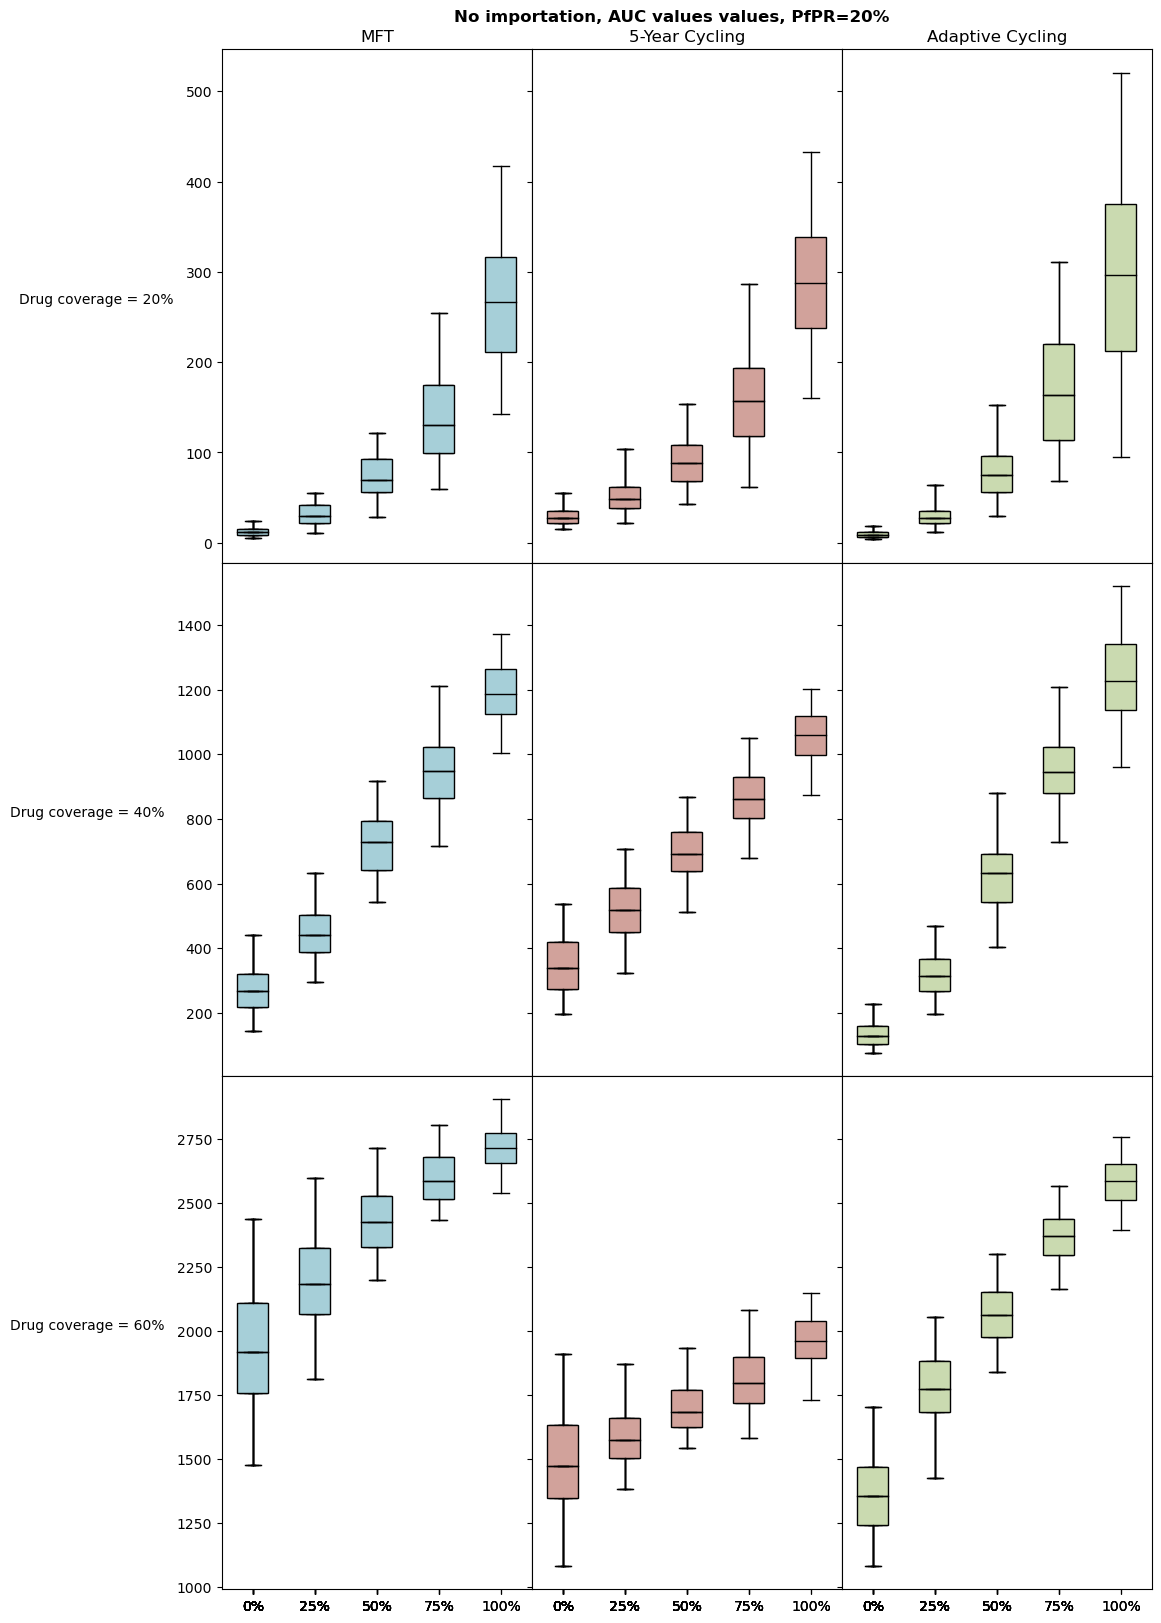

In [23]:
# no importation, AUC values
# 20% PfPR
plt.rcParams['figure.figsize'] = [12, 20]
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
ax_row1, ax_row2, ax_row3 = axes

# plot_settings
hide_95_percentile = False
verbose = True
if_have_importation = FigureSuperTitleOptions.NO_IMPORTATION
which_outcome_metric = FigureSuperTitleOptions.AUC
pfpr_setting, set_numbers = pfpr_setting_set_alias_dict['20%']
target_genotype = [ALL_TARGETED_5_TYPES_SET, 'ALL_TARGETED_5_TYPES_SET']
if_save_svg = True

for (set_alias, ax_row) in zip(set_numbers, [ax_row1, ax_row2, ax_row3]):
  ax_row_ptr = ax_row
  # each panel is one strategy
  for (ax_idx, strategy) in zip([0,1,2],StrategyOption):
    filtered_df_one_alias_importation_setting_one_strategy = final_ans_one_big_df[
      (final_ans_one_big_df['Set Alias Number'] == set_alias)
      & (final_ans_one_big_df['Have Importation'] == if_have_importation.value[0])
      & (final_ans_one_big_df['Treatment Strategy'] == strategy.value)
    ]
    plot_one_set_alias_across_iif_settings(
      ax_row_ptr[ax_idx],
      filtered_df_one_alias_importation_setting_one_strategy,
      target_genotype[0],
      which_outcome_metric.value[0],
      verbose=verbose,
      hide_95_percentile=False,
      strategy_selection=strategy,
      pfpr_setting=pfpr_setting,
      bxp_vert=True
    )

format_plot_labels_for_combined_panels_vertical_barplots(
  fig, 
  axes, 
  if_have_importation.value[1], 
  which_outcome_metric.value[1], 
  pfpr_setting
)
if if_save_svg: 
  plt.savefig(fname=f'{if_have_importation.value[1]}_{which_outcome_metric.value[1]}_{pfpr_setting}PfPR.svg', 
              format='svg', bbox_inches='tight')


METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
5-Year Cycling
  20.10 (  20.10-  20.10)
***interrupted_feeding=0p05***
5-Year Cycling
  18.94 (  16.64-  20.10)
***interrupted_feeding=0p1***
5-Year Cycling
  14.14 (  11.85-  16.20)
***interrupted_feeding=0p15***
5-Year Cycling
  12.18 (   9.89-  14.10)
***interrupted_feeding=0p2***
5-Year Cycling
  10.14 (   8.76-  12.22)
METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
Adaptive Cycling
  16.64 (  14.02-  19.46)
***interrupted_feeding=0p05***
Adaptive Cycling
  15.22 (  13.14-  18.88)
***interrupted_feeding=0p1***
Adaptive Cycling
  12.60 (  11.41-  15.04)
***interrupted_feeding=0p15***
Adaptive Cycling
  11.26 (   9.68-  13.12)
***interrupted_feeding=0p2***
Adaptive Cycling
   9.97 (   8.57-  11.81)
METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
MFT
  20.10 (  20.10-  20.10)
***interrupted_feeding=0p05***

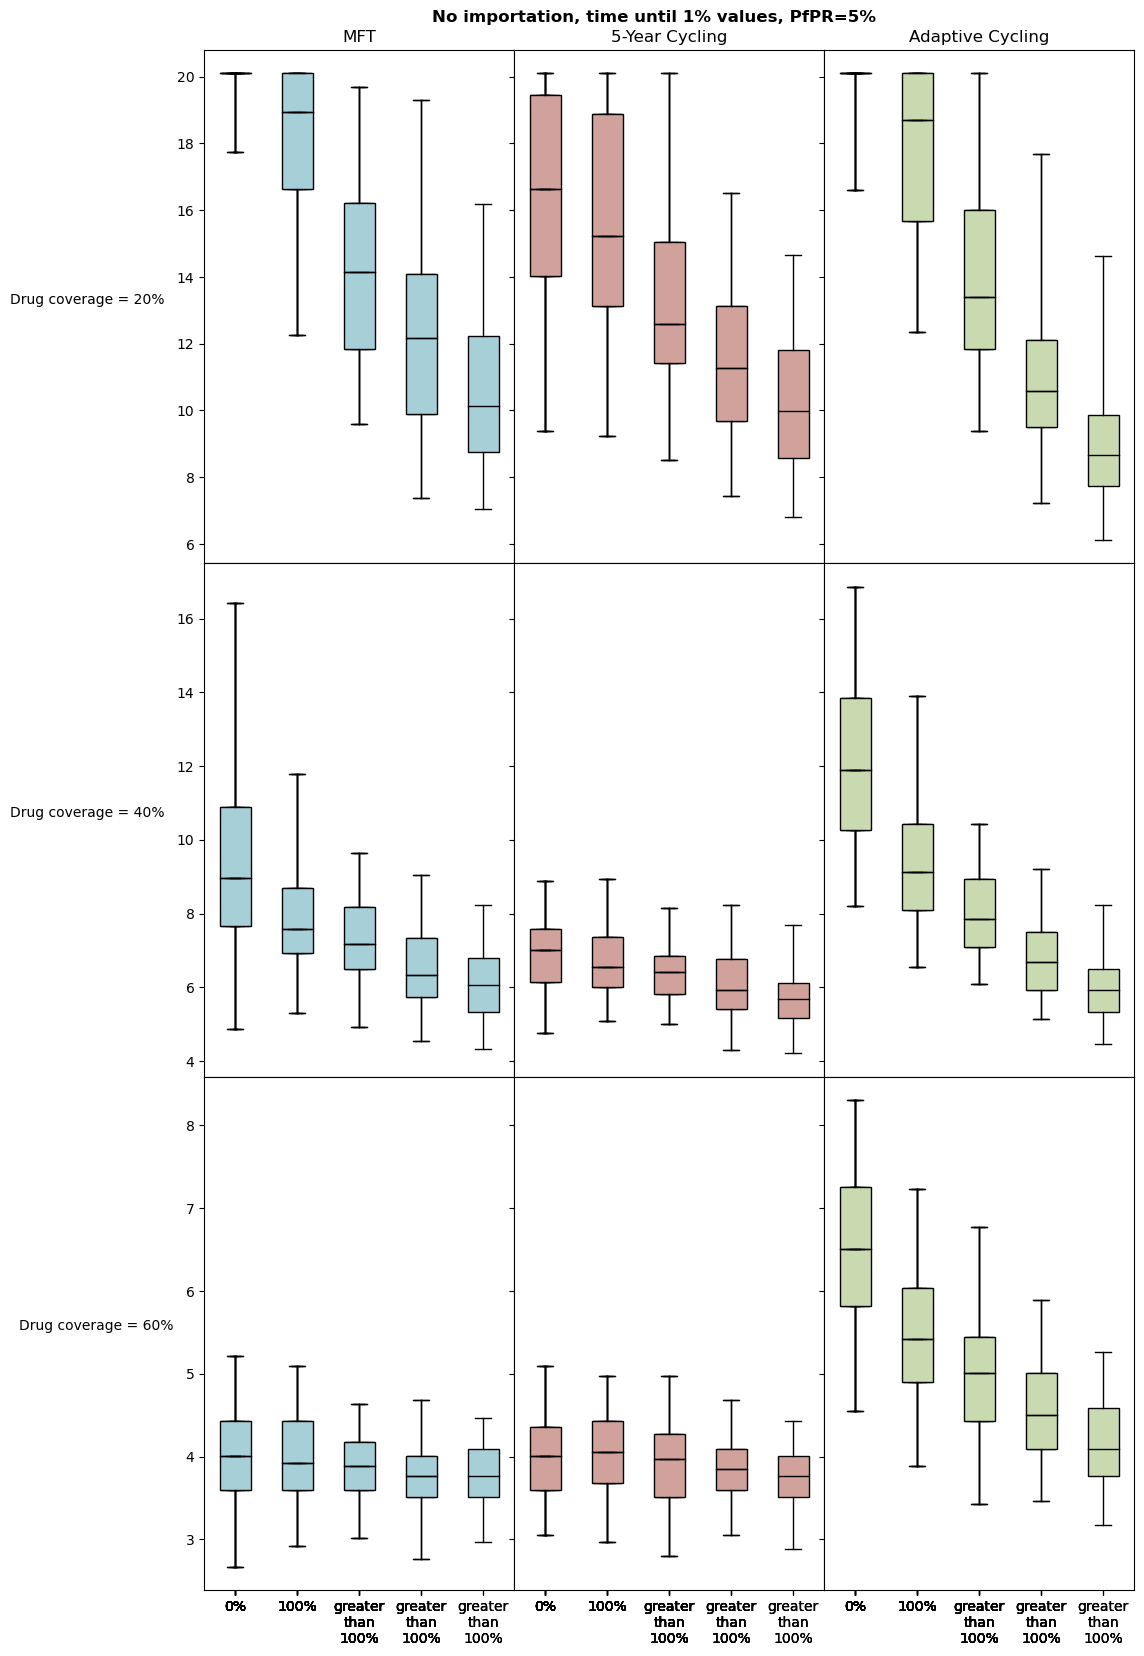

In [24]:
# no importation, time until 1% values
# 5% PfPR
plt.rcParams['figure.figsize'] = [12, 20]
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
ax_row1, ax_row2, ax_row3 = axes

# plot_settings
hide_95_percentile = False
verbose = True
if_have_importation = FigureSuperTitleOptions.NO_IMPORTATION
which_outcome_metric = FigureSuperTitleOptions.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
pfpr_setting, set_numbers = pfpr_setting_set_alias_dict['5%']
target_genotype = [ALL_TARGETED_5_TYPES_SET, 'ALL_TARGETED_5_TYPES_SET']
if_save_svg = True

for (set_alias, ax_row) in zip(set_numbers, [ax_row1, ax_row2, ax_row3]):
  ax_row_ptr = ax_row
  # each panel is one strategy
  for (ax_idx, strategy) in zip([0,1,2],StrategyOption):
    filtered_df_one_alias_importation_setting_one_strategy = final_ans_one_big_df[
      (final_ans_one_big_df['Set Alias Number'] == set_alias)
      & (final_ans_one_big_df['Have Importation'] == if_have_importation.value[0])
      & (final_ans_one_big_df['Treatment Strategy'] == strategy.value)
    ]
    plot_one_set_alias_across_iif_settings(
      ax_row_ptr[ax_idx],
      filtered_df_one_alias_importation_setting_one_strategy,
      target_genotype[0],
      which_outcome_metric.value[0],
      verbose=verbose,
      hide_95_percentile=False,
      strategy_selection=strategy,
      pfpr_setting=pfpr_setting,
      bxp_vert=True
    )

format_plot_labels_for_combined_panels_vertical_barplots(
  fig, 
  axes, 
  if_have_importation.value[1], 
  which_outcome_metric.value[1], 
  pfpr_setting
)
if if_save_svg: 
  plt.savefig(fname=f'{if_have_importation.value[1]}_{which_outcome_metric.value[1]}_{pfpr_setting}PfPR.svg', 
              format='svg', bbox_inches='tight')


METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
5-Year Cycling
  20.10 (  20.10-  20.10)
***interrupted_feeding=0p05***
5-Year Cycling
  17.56 (  16.35-  18.69)
***interrupted_feeding=0p1***
5-Year Cycling
  14.77 (  13.26-  15.68)
***interrupted_feeding=0p15***
5-Year Cycling
  11.85 (  10.35-  13.39)
***interrupted_feeding=0p2***
5-Year Cycling
   9.72 (   8.99-  10.76)
METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
Adaptive Cycling
  19.52 (  16.66-  20.10)
***interrupted_feeding=0p05***
Adaptive Cycling
  14.47 (  12.97-  16.35)
***interrupted_feeding=0p1***
Adaptive Cycling
  11.89 (  11.00-  13.14)
***interrupted_feeding=0p15***
Adaptive Cycling
  10.18 (   9.26-  11.62)
***interrupted_feeding=0p2***
Adaptive Cycling
   8.68 (   7.99-   9.76)
METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
MFT
  20.10 (  20.10-  20.10)
***interrupted_feeding=0p05***

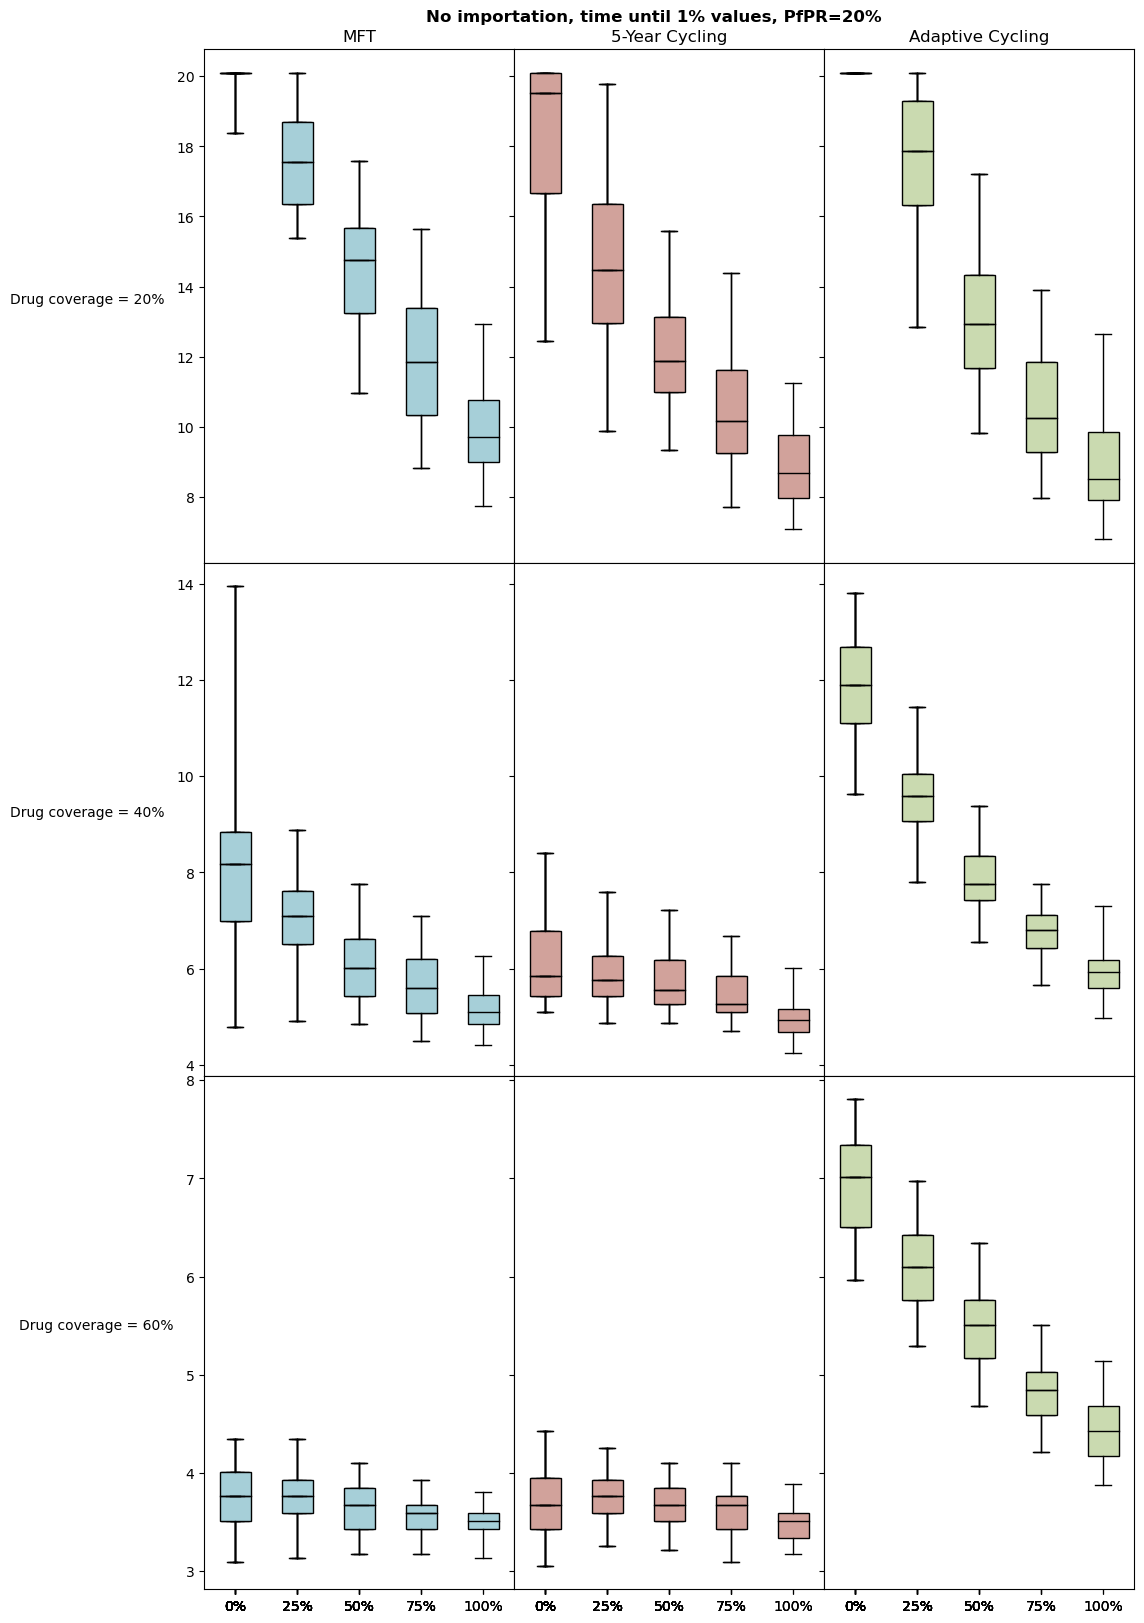

In [25]:
# no importation, time until 1% values
# 20% PfPR
plt.rcParams['figure.figsize'] = [12, 20]
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
ax_row1, ax_row2, ax_row3 = axes

# plot_settings
hide_95_percentile = False
verbose = True
if_have_importation = FigureSuperTitleOptions.NO_IMPORTATION
which_outcome_metric = FigureSuperTitleOptions.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
pfpr_setting, set_numbers = pfpr_setting_set_alias_dict['20%']
target_genotype = [ALL_TARGETED_5_TYPES_SET, 'ALL_TARGETED_5_TYPES_SET']
if_save_svg = True

for (set_alias, ax_row) in zip(set_numbers, [ax_row1, ax_row2, ax_row3]):
  ax_row_ptr = ax_row
  # each panel is one strategy
  for (ax_idx, strategy) in zip([0,1,2],StrategyOption):
    filtered_df_one_alias_importation_setting_one_strategy = final_ans_one_big_df[
      (final_ans_one_big_df['Set Alias Number'] == set_alias)
      & (final_ans_one_big_df['Have Importation'] == if_have_importation.value[0])
      & (final_ans_one_big_df['Treatment Strategy'] == strategy.value)
    ]
    plot_one_set_alias_across_iif_settings(
      ax_row_ptr[ax_idx],
      filtered_df_one_alias_importation_setting_one_strategy,
      target_genotype[0],
      which_outcome_metric.value[0],
      verbose=verbose,
      hide_95_percentile=False,
      strategy_selection=strategy,
      pfpr_setting=pfpr_setting,
      bxp_vert=True
    )

format_plot_labels_for_combined_panels_vertical_barplots(
  fig, 
  axes, 
  if_have_importation.value[1], 
  which_outcome_metric.value[1], 
  pfpr_setting
)
if if_save_svg: 
  plt.savefig(fname=f'{if_have_importation.value[1]}_{which_outcome_metric.value[1]}_{pfpr_setting}PfPR.svg', 
              format='svg', bbox_inches='tight')


In [26]:
# with importations

METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
5-Year Cycling
  11.03 (   6.88-  16.48)
***interrupted_feeding=0p05***
5-Year Cycling
  25.63 (  16.05-  39.21)
***interrupted_feeding=0p1***
5-Year Cycling
  58.82 (  36.59-  89.73)
***interrupted_feeding=0p15***
5-Year Cycling
 125.28 (  65.47- 179.73)
***interrupted_feeding=0p2***
5-Year Cycling
 266.82 ( 187.83- 331.12)
METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
Adaptive Cycling
  37.64 (  19.60-  60.81)
***interrupted_feeding=0p05***
Adaptive Cycling
  40.73 (  25.79-  66.06)
***interrupted_feeding=0p1***
Adaptive Cycling
  64.44 (  41.31-  94.55)
***interrupted_feeding=0p15***
Adaptive Cycling
 118.56 (  72.68- 170.65)
***interrupted_feeding=0p2***
Adaptive Cycling
 208.86 ( 128.03- 306.01)
METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
MFT
   9.90 (   6.04-  15.29)
***interrupted_feeding=0p05***
MFT
  27.75 (  14.81-  41.27)
***interrupted_feeding=0p1***
MFT
  71.94 (  47.27- 117.15)
**

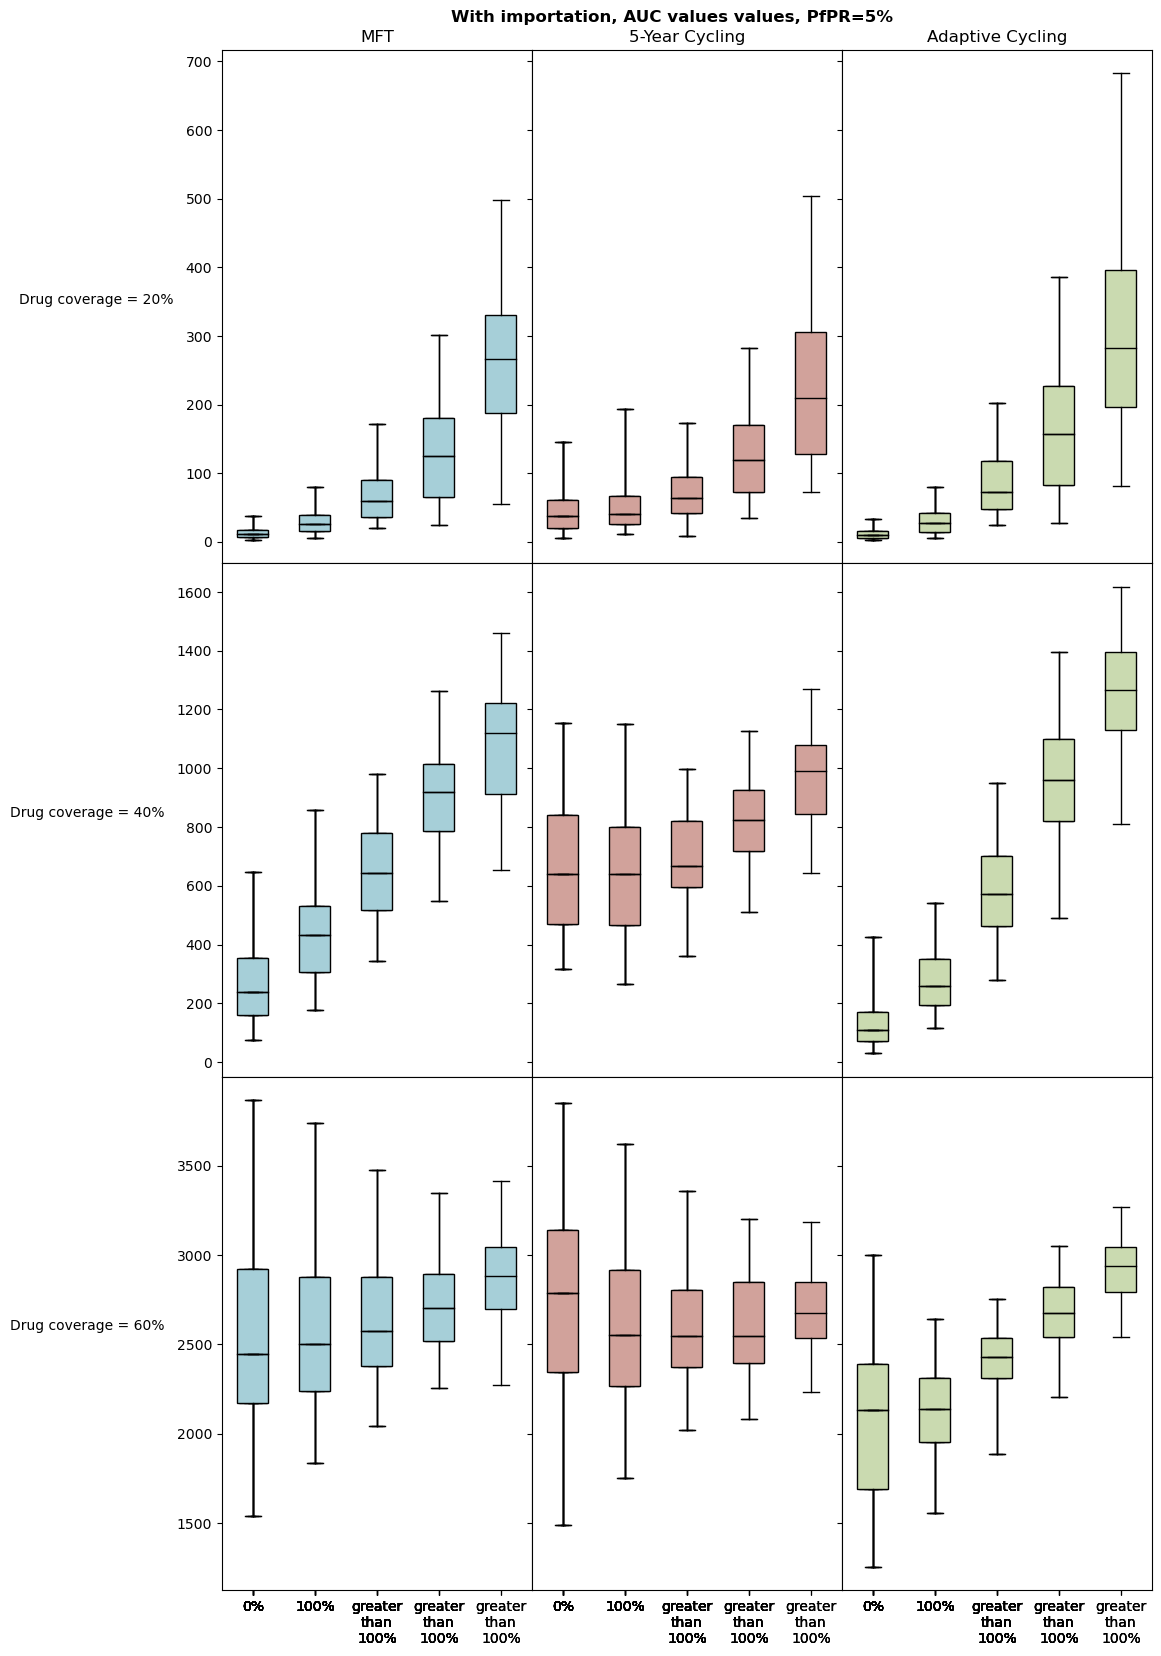

In [27]:
# with importation, AUC values
# 5% PfPR
plt.rcParams['figure.figsize'] = [12, 20]
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
ax_row1, ax_row2, ax_row3 = axes

# plot_settings
hide_95_percentile = False
verbose = True
if_have_importation = FigureSuperTitleOptions.WITH_IMPORTATION
which_outcome_metric = FigureSuperTitleOptions.AUC
pfpr_setting, set_numbers = pfpr_setting_set_alias_dict['5%']
target_genotype = [ALL_TARGETED_5_TYPES_SET, 'ALL_TARGETED_5_TYPES_SET']
if_save_svg = True

for (set_alias, ax_row) in zip(set_numbers, [ax_row1, ax_row2, ax_row3]):
  ax_row_ptr = ax_row
  # each panel is one strategy
  for (ax_idx, strategy) in zip([0,1,2],StrategyOption):
    filtered_df_one_alias_importation_setting_one_strategy = final_ans_one_big_df[
      (final_ans_one_big_df['Set Alias Number'] == set_alias)
      & (final_ans_one_big_df['Have Importation'] == if_have_importation.value[0])
      & (final_ans_one_big_df['Treatment Strategy'] == strategy.value)
    ]
    plot_one_set_alias_across_iif_settings(
      ax_row_ptr[ax_idx],
      filtered_df_one_alias_importation_setting_one_strategy,
      target_genotype[0],
      which_outcome_metric.value[0],
      verbose=verbose,
      hide_95_percentile=False,
      strategy_selection=strategy,
      pfpr_setting=pfpr_setting,
      bxp_vert=True
    )

format_plot_labels_for_combined_panels_vertical_barplots(
  fig, 
  axes, 
  if_have_importation.value[1], 
  which_outcome_metric.value[1], 
  pfpr_setting
)
if if_save_svg: 
  plt.savefig(fname=f'{if_have_importation.value[1]}_{which_outcome_metric.value[1]}_{pfpr_setting}PfPR.svg', 
              format='svg', bbox_inches='tight')


METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
5-Year Cycling
  12.87 (  10.69-  17.09)
***interrupted_feeding=0p05***
5-Year Cycling
  33.70 (  24.66-  42.01)
***interrupted_feeding=0p1***
5-Year Cycling
  80.64 (  59.08- 100.43)
***interrupted_feeding=0p15***
5-Year Cycling
 148.56 ( 107.15- 191.10)
***interrupted_feeding=0p2***
5-Year Cycling
 255.56 ( 206.09- 322.29)
METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
Adaptive Cycling
  30.66 (  21.83-  40.30)
***interrupted_feeding=0p05***
Adaptive Cycling
  46.82 (  37.59-  57.10)
***interrupted_feeding=0p1***
Adaptive Cycling
  89.27 (  72.69- 108.63)
***interrupted_feeding=0p15***
Adaptive Cycling
 163.81 ( 127.26- 203.13)
***interrupted_feeding=0p2***
Adaptive Cycling
 282.56 ( 227.81- 337.34)
METRIC=OutcomeMetricOption.AUC
***interrupted_feeding=0p0***
MFT
   9.56 (   7.48-  12.63)
***interrupted_feeding=0p05***
MFT
  24.40 (  17.37-  36.31)
***interrupted_feeding=0p1***
MFT
  70.28 (  54.43-  97.81)
**

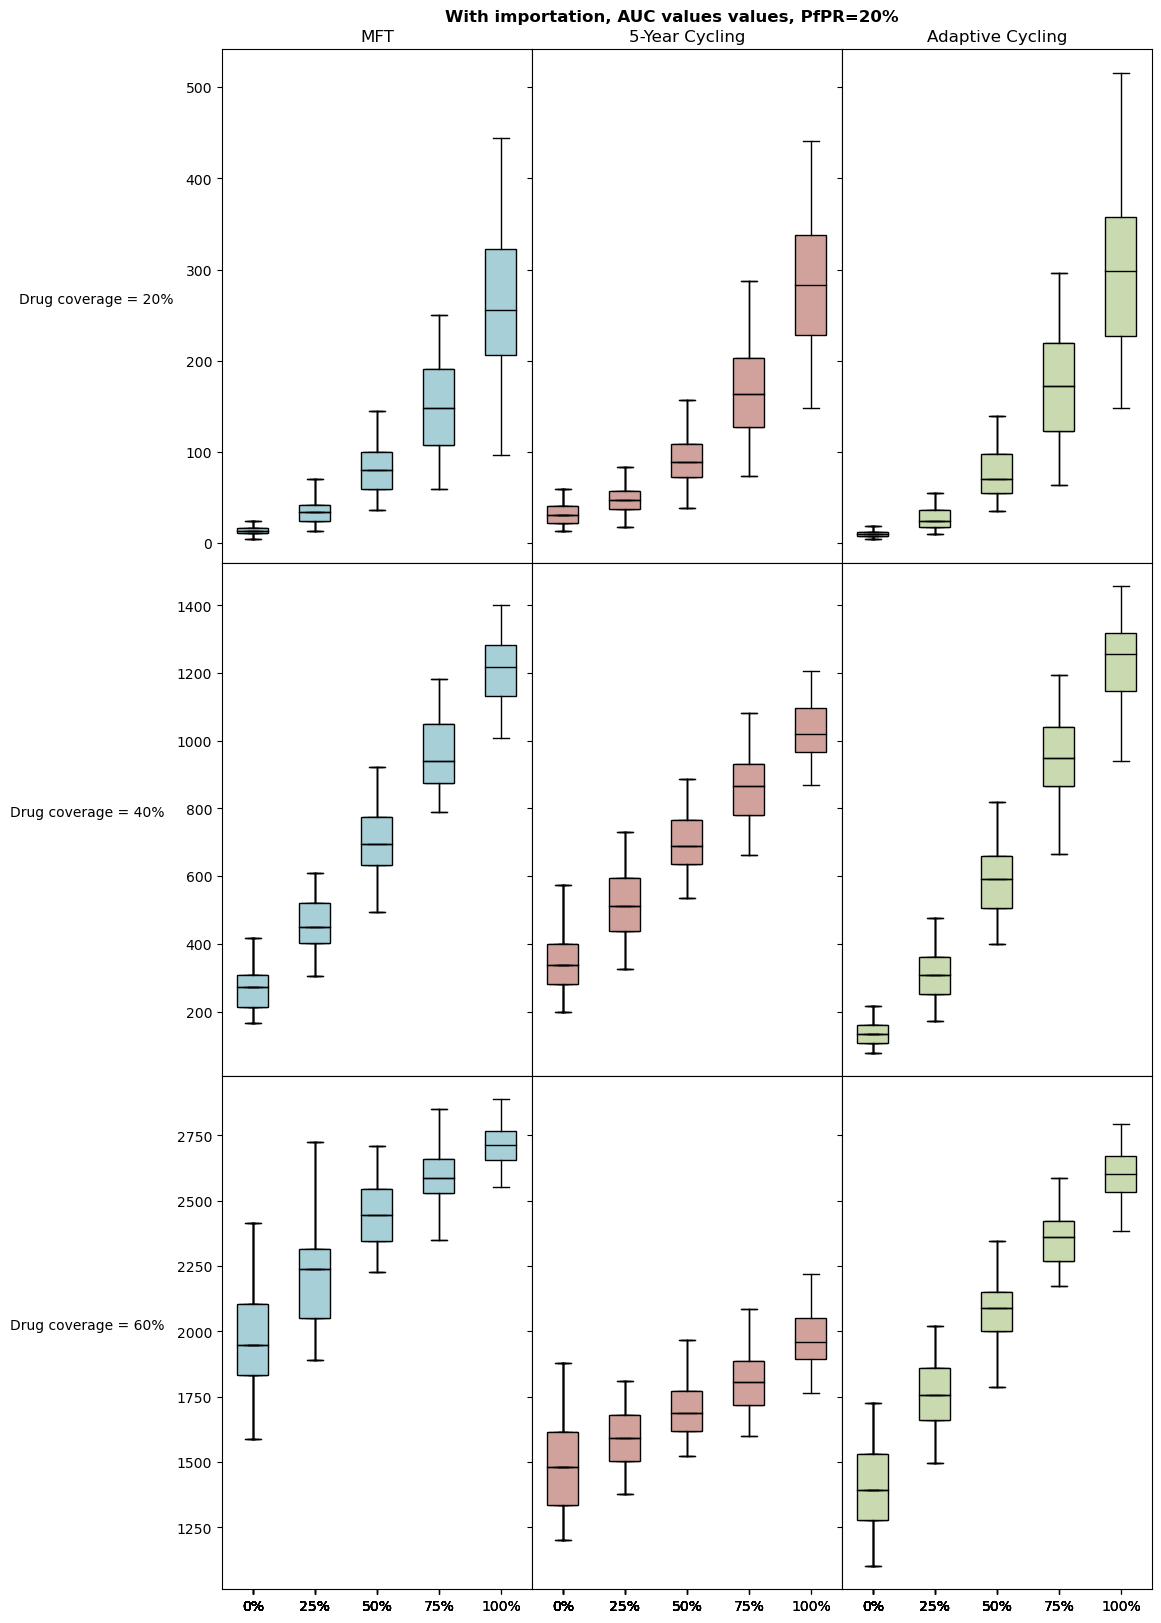

In [28]:
# with importation, AUC values
# 20% PfPR
plt.rcParams['figure.figsize'] = [12, 20]
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
ax_row1, ax_row2, ax_row3 = axes

# plot_settings
hide_95_percentile = False
verbose = True
if_have_importation = FigureSuperTitleOptions.WITH_IMPORTATION
which_outcome_metric = FigureSuperTitleOptions.AUC
pfpr_setting, set_numbers = pfpr_setting_set_alias_dict['20%']
target_genotype = [ALL_TARGETED_5_TYPES_SET, 'ALL_TARGETED_5_TYPES_SET']
if_save_svg = True

for (set_alias, ax_row) in zip(set_numbers, [ax_row1, ax_row2, ax_row3]):
  ax_row_ptr = ax_row
  # each panel is one strategy
  for (ax_idx, strategy) in zip([0,1,2],StrategyOption):
    filtered_df_one_alias_importation_setting_one_strategy = final_ans_one_big_df[
      (final_ans_one_big_df['Set Alias Number'] == set_alias)
      & (final_ans_one_big_df['Have Importation'] == if_have_importation.value[0])
      & (final_ans_one_big_df['Treatment Strategy'] == strategy.value)
    ]
    plot_one_set_alias_across_iif_settings(
      ax_row_ptr[ax_idx],
      filtered_df_one_alias_importation_setting_one_strategy,
      target_genotype[0],
      which_outcome_metric.value[0],
      verbose=verbose,
      hide_95_percentile=False,
      strategy_selection=strategy,
      pfpr_setting=pfpr_setting,
      bxp_vert=True
    )

format_plot_labels_for_combined_panels_vertical_barplots(
  fig, 
  axes, 
  if_have_importation.value[1], 
  which_outcome_metric.value[1], 
  pfpr_setting
)
if if_save_svg: 
  plt.savefig(fname=f'{if_have_importation.value[1]}_{which_outcome_metric.value[1]}_{pfpr_setting}PfPR.svg', 
              format='svg', bbox_inches='tight')


METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
5-Year Cycling
  20.10 (  20.10-  20.10)
***interrupted_feeding=0p05***
5-Year Cycling
  18.43 (  16.56-  20.10)
***interrupted_feeding=0p1***
5-Year Cycling
  15.10 (  12.74-  16.64)
***interrupted_feeding=0p15***
5-Year Cycling
  11.85 (  10.08-  14.54)
***interrupted_feeding=0p2***
5-Year Cycling
   9.26 (   8.47-  10.64)
METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
Adaptive Cycling
  15.85 (  14.16-  18.71)
***interrupted_feeding=0p05***
Adaptive Cycling
  15.14 (  12.93-  18.10)
***interrupted_feeding=0p1***
Adaptive Cycling
  13.39 (  11.58-  15.52)
***interrupted_feeding=0p15***
Adaptive Cycling
  11.26 (   9.93-  13.18)
***interrupted_feeding=0p2***
Adaptive Cycling
  10.01 (   8.66-  11.60)
METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
MFT
  20.10 (  20.10-  20.10)
***interrupted_feeding=0p05***

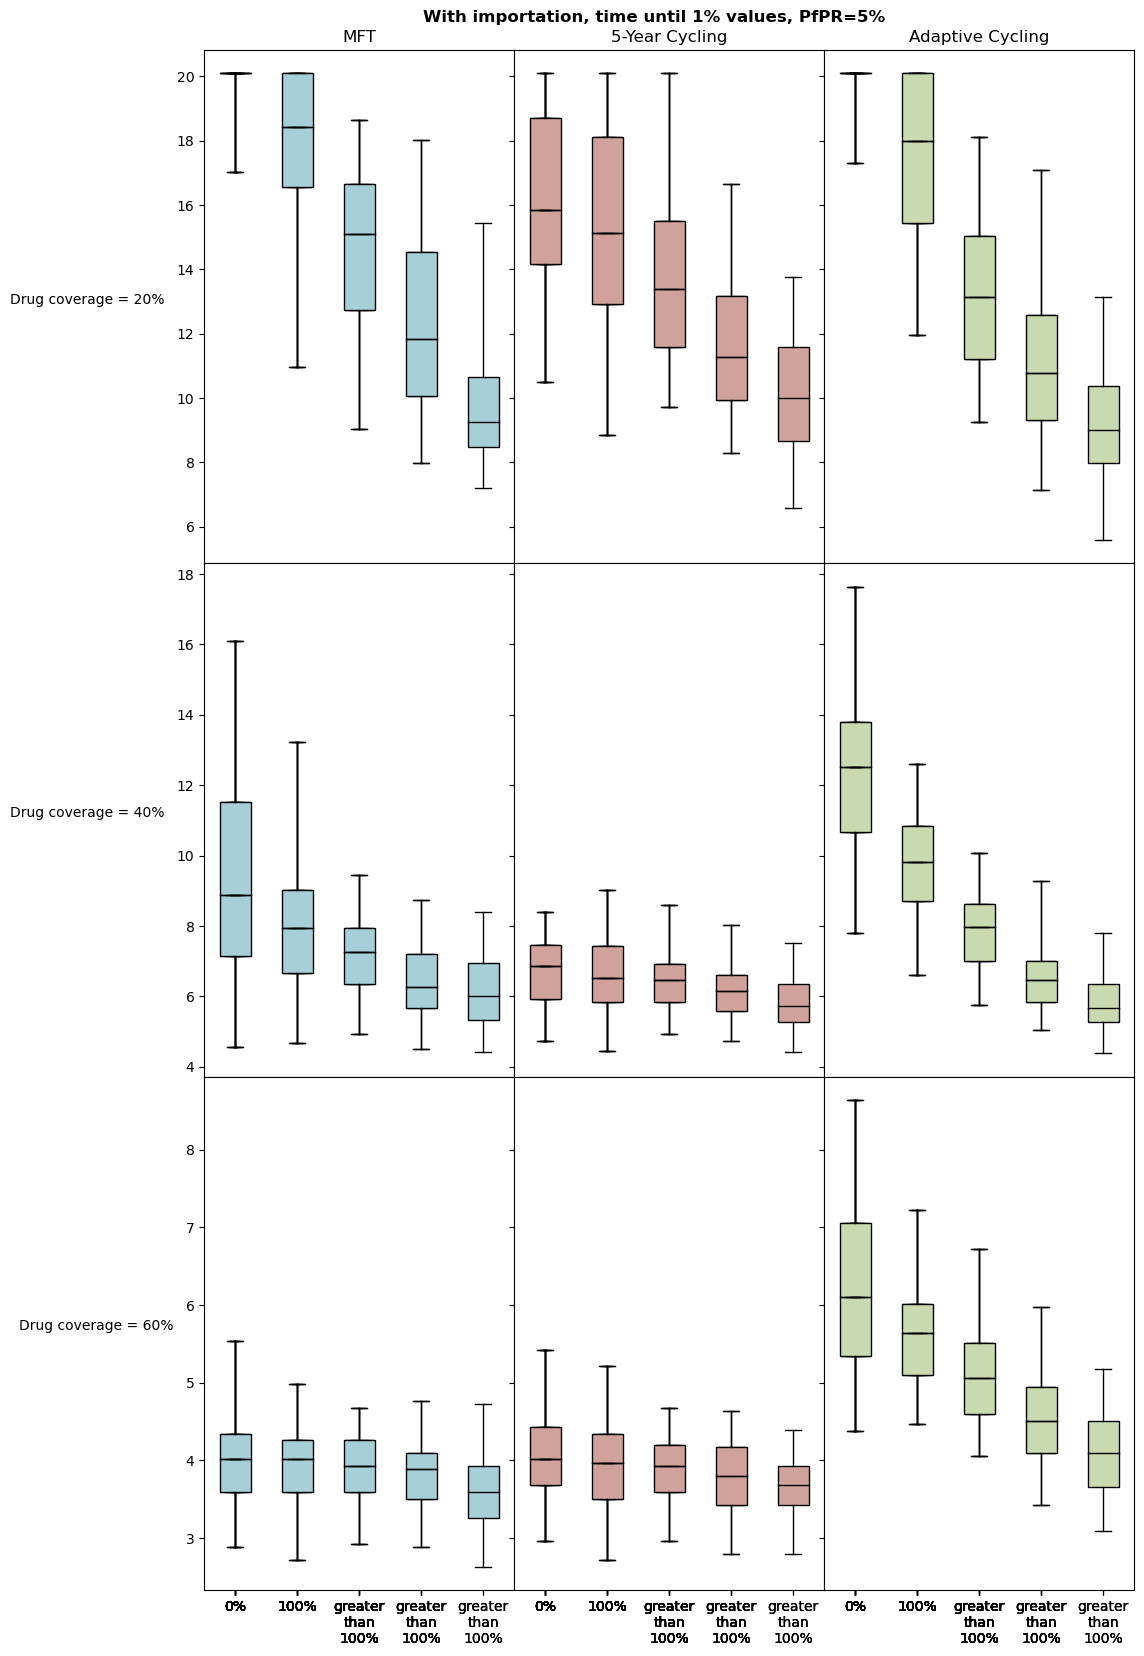

In [29]:
# with importation, time until 1% values
# 5% PfPR
plt.rcParams['figure.figsize'] = [12, 20]
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
ax_row1, ax_row2, ax_row3 = axes

# plot_settings
hide_95_percentile = False
verbose = True
if_have_importation = FigureSuperTitleOptions.WITH_IMPORTATION
which_outcome_metric = FigureSuperTitleOptions.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
pfpr_setting, set_numbers = pfpr_setting_set_alias_dict['5%']
target_genotype = [ALL_TARGETED_5_TYPES_SET, 'ALL_TARGETED_5_TYPES_SET']
if_save_svg = True

for (set_alias, ax_row) in zip(set_numbers, [ax_row1, ax_row2, ax_row3]):
  ax_row_ptr = ax_row
  # each panel is one strategy
  for (ax_idx, strategy) in zip([0,1,2],StrategyOption):
    filtered_df_one_alias_importation_setting_one_strategy = final_ans_one_big_df[
      (final_ans_one_big_df['Set Alias Number'] == set_alias)
      & (final_ans_one_big_df['Have Importation'] == if_have_importation.value[0])
      & (final_ans_one_big_df['Treatment Strategy'] == strategy.value)
    ]
    plot_one_set_alias_across_iif_settings(
      ax_row_ptr[ax_idx],
      filtered_df_one_alias_importation_setting_one_strategy,
      target_genotype[0],
      which_outcome_metric.value[0],
      verbose=verbose,
      hide_95_percentile=False,
      strategy_selection=strategy,
      pfpr_setting=pfpr_setting,
      bxp_vert=True
    )

format_plot_labels_for_combined_panels_vertical_barplots(
  fig, 
  axes, 
  if_have_importation.value[1], 
  which_outcome_metric.value[1], 
  pfpr_setting
)
if if_save_svg: 
  plt.savefig(fname=f'{if_have_importation.value[1]}_{which_outcome_metric.value[1]}_{pfpr_setting}PfPR.svg', 
              format='svg', bbox_inches='tight')


METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
5-Year Cycling
  20.10 (  19.94-  20.10)
***interrupted_feeding=0p05***
5-Year Cycling
  16.98 (  16.33-  18.04)
***interrupted_feeding=0p1***
5-Year Cycling
  14.14 (  12.56-  15.52)
***interrupted_feeding=0p15***
5-Year Cycling
  11.60 (  10.01-  12.85)
***interrupted_feeding=0p2***
5-Year Cycling
   9.72 (   8.83-  10.87)
METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
Adaptive Cycling
  18.69 (  15.60-  20.10)
***interrupted_feeding=0p05***
Adaptive Cycling
  14.52 (  13.26-  16.20)
***interrupted_feeding=0p1***
Adaptive Cycling
  11.85 (  10.76-  12.62)
***interrupted_feeding=0p15***
Adaptive Cycling
  10.14 (   9.24-  11.04)
***interrupted_feeding=0p2***
Adaptive Cycling
   9.01 (   8.18-   9.76)
METRIC=OutcomeMetricOption.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
***interrupted_feeding=0p0***
MFT
  20.10 (  20.10-  20.10)
***interrupted_feeding=0p05***

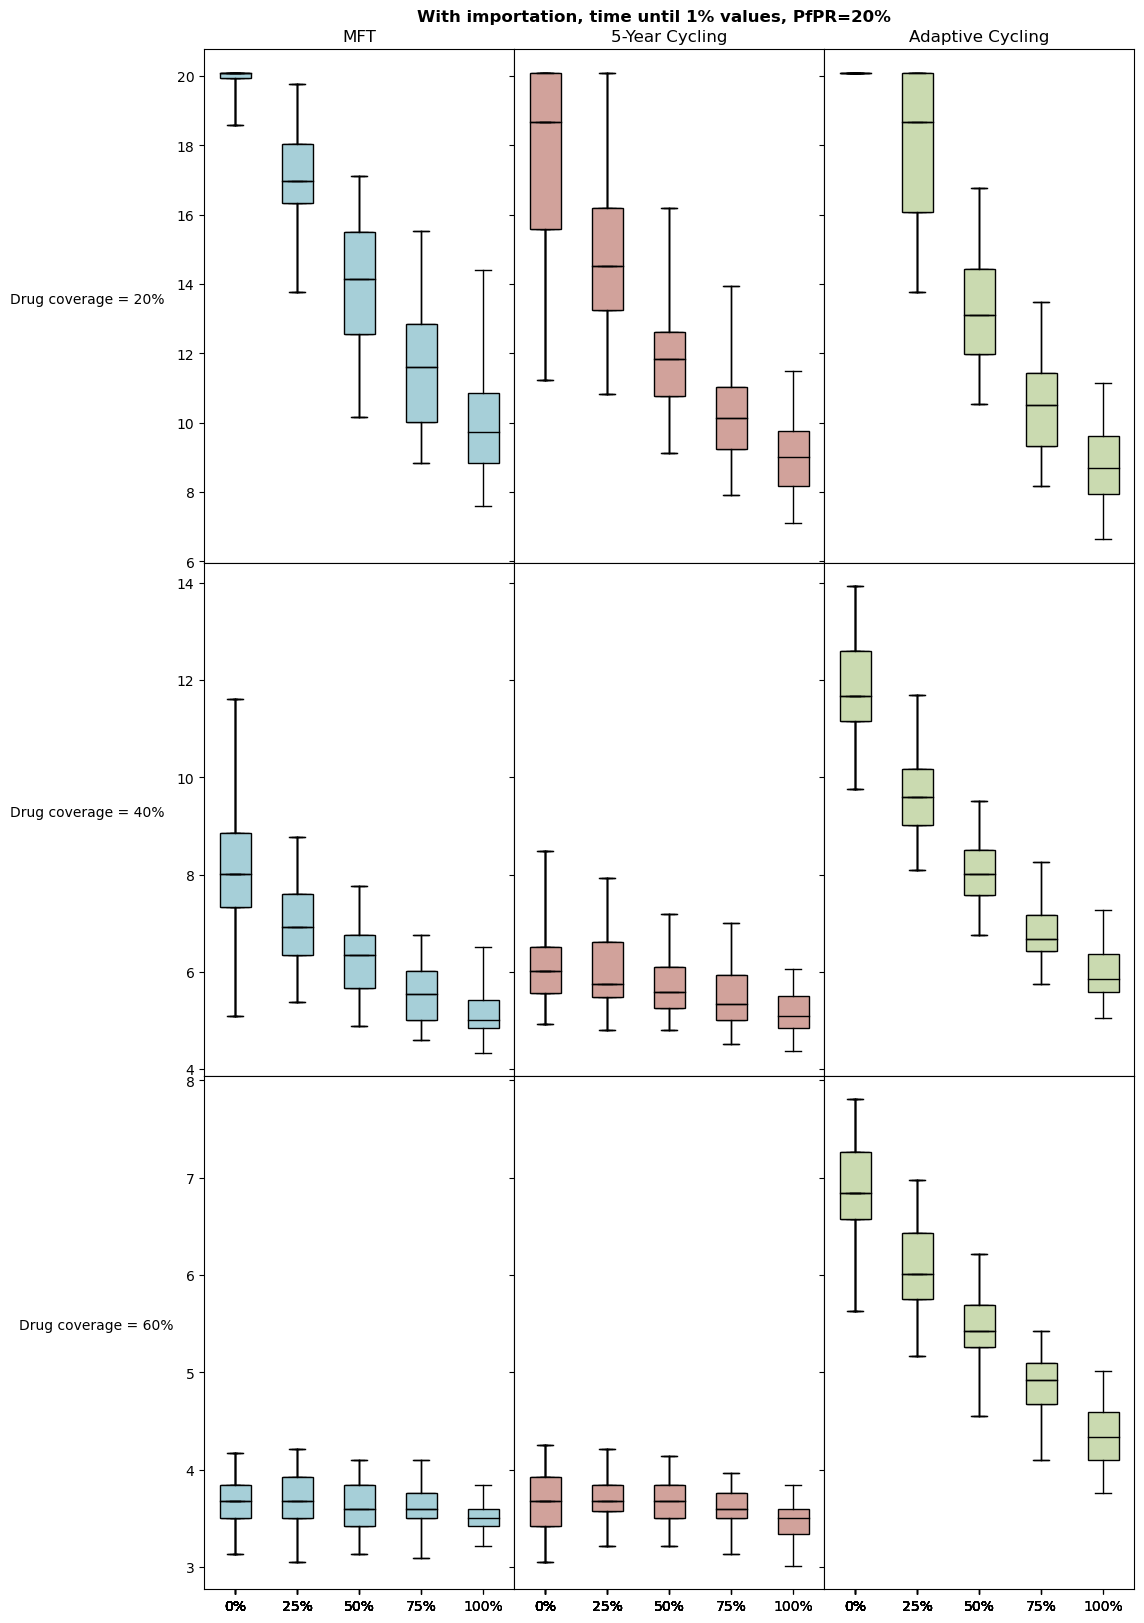

In [30]:
# with importation, time until 1% values
# 20% PfPR
plt.rcParams['figure.figsize'] = [12, 20]
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
ax_row1, ax_row2, ax_row3 = axes

# plot_settings
hide_95_percentile = False
verbose = True
if_have_importation = FigureSuperTitleOptions.WITH_IMPORTATION
which_outcome_metric = FigureSuperTitleOptions.T_UNTIL_1_PERCENT_IN_20_YR_SETTING
pfpr_setting, set_numbers = pfpr_setting_set_alias_dict['20%']
target_genotype = [ALL_TARGETED_5_TYPES_SET, 'ALL_TARGETED_5_TYPES_SET']
if_save_svg = True

for (set_alias, ax_row) in zip(set_numbers, [ax_row1, ax_row2, ax_row3]):
  ax_row_ptr = ax_row
  # each panel is one strategy
  for (ax_idx, strategy) in zip([0,1,2],StrategyOption):
    filtered_df_one_alias_importation_setting_one_strategy = final_ans_one_big_df[
      (final_ans_one_big_df['Set Alias Number'] == set_alias)
      & (final_ans_one_big_df['Have Importation'] == if_have_importation.value[0])
      & (final_ans_one_big_df['Treatment Strategy'] == strategy.value)
    ]
    plot_one_set_alias_across_iif_settings(
      ax_row_ptr[ax_idx],
      filtered_df_one_alias_importation_setting_one_strategy,
      target_genotype[0],
      which_outcome_metric.value[0],
      verbose=verbose,
      hide_95_percentile=False,
      strategy_selection=strategy,
      pfpr_setting=pfpr_setting,
      bxp_vert=True
    )

format_plot_labels_for_combined_panels_vertical_barplots(
  fig, 
  axes, 
  if_have_importation.value[1], 
  which_outcome_metric.value[1], 
  pfpr_setting
)
if if_save_svg: 
  plt.savefig(fname=f'{if_have_importation.value[1]}_{which_outcome_metric.value[1]}_{pfpr_setting}PfPR.svg', 
              format='svg', bbox_inches='tight')
